In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# os libraries
from pathlib import Path
import pickle
import os, glob

# Required Libraries

# Base Python Libraries
import json
import requests
import pandas as pd
import numpy as np
from tqdm import tqdm
import re
from collections import OrderedDict, Counter
import string
from ast import literal_eval

# Datetime utilities
import datetime
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import calendar

#Visualizations
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
import matplotlib.dates as mdates

#Natural Language Processing (NLP)

import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from sklearn.decomposition import LatentDirichletAllocation
from joblib import Parallel, delayed
from gensim.parsing.preprocessing import STOPWORDS as SW
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import unicodedata
import nltk
import csv
import string
import gensim
!pip install sentence_transformers
from gensim.models import CoherenceModel
from pprint import pprint
from gensim import corpora
nltk.download('all')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 998.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.3 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=bda44ea8f77b6e91019ce6d8b32a6fb026da4264efbd6b800e85c53d3993324a
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [3]:
!pip install demoji
import demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 644.1 kB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
senwave_japan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tweets_Indonesia.csv')
print("Length of Senwave Japan Dataset = {}".format(len(senwave_japan)))

Length of Senwave Japan Dataset = 229935


<ipython-input-5-80a1fca28147>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  senwave_japan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tweets_Indonesia.csv')


In [6]:
senwave_japan.drop(senwave_japan.columns[0], axis=1, inplace = True)

In [7]:
senwave_japan.head()

created_at                     id  \
0  Wed Dec 08 04:26:24 +0000 2021  1468436777123807232.0   
1  Wed Dec 08 04:28:11 +0000 2021  1468437225574526976.0   
2  Wed Dec 08 04:28:28 +0000 2021  1468437299008442368.0   
3  Wed Dec 08 04:29:10 +0000 2021  1468437474003206144.0   
4  Wed Dec 08 04:29:24 +0000 2021  1468437531515568128.0   

                                                text  \
0  @cryptocclub01 @DeepBrainChain COVID 19 has sl...   
1  RT @baemyooji: aespa received '2021 Visionary ...   
2  RT @FaheemYounus: Omicron does not spread thro...   
3  Hopefully im win..still believe @ElrondNetwork...   
4  RT @michaelmina_lab: I can’t believe this isn’...   

                user_location  
0                   Indonesia  
1  Kota Batam, Kepulauan Riau  
2           Bekasi, Indonesia  
3      Bogor Barat, Indonesia  
4   into an alternate reality

In [8]:
senwave_japan['created_at'] = pd.to_datetime(senwave_japan['created_at'],  errors = 'coerce')

In [9]:
first_wave = senwave_japan[(senwave_japan['created_at'] >= '2020-04-01') & (senwave_japan['created_at'] <= '2021-01-31')]
second_wave = senwave_japan[(senwave_japan['created_at'] >= '2021-03-01') & (senwave_japan['created_at'] < '2021-06-30')]
third_wave = senwave_japan[(senwave_japan['created_at'] >= '2022-01-01') & (senwave_japan['created_at'] < '2022-02-28')]

In [10]:
# senwave_japan = pd.concat([first_wave, second_wave, third_wave])

print(senwave_japan.shape)

senwave_japan.head()

(229935, 4)


created_at                     id  \
0 2021-12-08 04:26:24+00:00  1468436777123807232.0   
1 2021-12-08 04:28:11+00:00  1468437225574526976.0   
2 2021-12-08 04:28:28+00:00  1468437299008442368.0   
3 2021-12-08 04:29:10+00:00  1468437474003206144.0   
4 2021-12-08 04:29:24+00:00  1468437531515568128.0   

                                                text  \
0  @cryptocclub01 @DeepBrainChain COVID 19 has sl...   
1  RT @baemyooji: aespa received '2021 Visionary ...   
2  RT @FaheemYounus: Omicron does not spread thro...   
3  Hopefully im win..still believe @ElrondNetwork...   
4  RT @michaelmina_lab: I can’t believe this isn’...   

                user_location  
0                   Indonesia  
1  Kota Batam, Kepulauan Riau  
2           Bekasi, Indonesia  
3      Bogor Barat, Indonesia  
4   into an alternate reality

In [11]:
print(first_wave.shape, second_wave.shape, third_wave.shape)

(20207, 4) (44107, 4) (3262, 4)


In [12]:
def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    StopWords = stopwords.words('english') + ['t', 'rt', 'ti', 'vk', 'to', 'co','dqlw', 'z', 'nd', 'm', 's', 'kur', 'u', 'o', 'd', 'http', 'https']
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in StopWords]

In [13]:
senwave_japan = senwave_japan[senwave_japan['user_location'].str.contains('Indonesia|Aceh|Banda Aceh|Sabang|Bali|Denpasar|Singaraja|Bangka Belitung|Pangkalpinang|Banten|Bengkulu|Bengkulu|Central Java|Magelang|Pekalongan|Rembang|Salatiga|Semarang|Tegal|Central Kalimantan|Central Sulawesi|Palu|East Java|Banyuwangi|Blitar|Jember|Kediri|Madiun|Malang|Pasuruan|Probolinggo|Surabaya|Tuban|East Kalimantan|Balikpapan|Samarinda|East Nusa Tenggara |Kupang|Gorontalo|Jakarta|Jambi|Lampung|Bandar Lampung|Maluku|Ambon|North Kalimantan|North Maluku|North Sulawesi|Manado|North Sumatra|Belawan|Medan|Pematangsiantar|Sibolga|Papua|Jayapura|Riau|Pekanbaru|Riau Islands|South Kalimantan|Banjarmasin|Palangkaraya|South Sulawesi|Makassar|Kendari|South Sumatra|Palembang|Pangkalpinang|Southeast Sulawesi|Kendari|West Java|Bandung|Bogor|Cirebon|Sukabumi|Tasikmalaya|West Kalimantan|Pontianak|West Nusa Tenggara|Mataram|West Papua|West Sulawesi|West Sumatra|Bukittinggi|Padang|Yogyakarta')==True]

In [14]:
senwave_japan

created_at                     id  \
0      2021-12-08 04:26:24+00:00  1468436777123807232.0   
1      2021-12-08 04:28:11+00:00  1468437225574526976.0   
2      2021-12-08 04:28:28+00:00  1468437299008442368.0   
3      2021-12-08 04:29:10+00:00  1468437474003206144.0   
5      2021-12-08 04:29:50+00:00  1468437641846669312.0   
...                          ...                    ...   
229930 2020-08-21 22:50:19+00:00    1296942738546536449   
229931 2020-08-21 22:50:23+00:00    1296942756414144513   
229932 2020-08-21 22:50:34+00:00    1296942799258968065   
229933 2020-08-21 22:50:31+00:00    1296942790396452864   
229934 2020-08-21 22:50:43+00:00    1296942840702853120   

                                                     text  \
0       @cryptocclub01 @DeepBrainChain COVID 19 has sl...   
1       RT @baemyooji: aespa received '2021 Visionary ...   
2       RT @FaheemYounus: Omicron does not spread thro...   
3       Hopefully im win..still believe @ElrondNetwork...   
5       RT @ViniDiMambro: Middle of a pandemic &amp; @...   
...                                                   ...   
229930  RT @AidaGreenbury: The silent suffering of Ind...   
229931  RT @9GAG: Type "during quarantine, I learned h...   
229932  RT @NASASun: Three years ago today, millions o...   
229933  RT @lenoretaylor: Why did we expect aged care ...   
229934  You have to add Indonesia with USA https://t.c...   

                        user_location  
0                           Indonesia  
1          Kota Batam, Kepulauan Riau  
2                   Bekasi, Indonesia  
3              Bogor Barat, Indonesia  
5              Jakarta Capital Region  
...                               ...  
229930  London, Norfolk, Bali, Borneo  
229931   Jakarta Selatan, DKI Jakarta  
229932             Malang, Jawa Timur  
229933                Bali, Indonesia  
229934                 Jakarta.  Bali  

[185067 rows x 4 columns]

In [15]:
words = clean(''.join(str(senwave_japan['text'].tolist())))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '(covid, 19)'),
  Text(0, 1, '(tested, negative)'),
  Text(0, 2, '(social, distancing)'),
  Text(0, 3, '(indonesian, player)'),
  Text(0, 4, '(well, soon)'),
  Text(0, 5, '(wear, mask)'),
  Text(0, 6, '(covid, vaccine)'),
  Text(0, 7, '(get, well)'),
  Text(0, 8, '(test, positive)'),
  Text(0, 9, '(covid19, case)'),
  Text(0, 10, '(work, home)'),
  Text(0, 11, '(covid19, pandemic)'),
  Text(0, 12, '(covid19, vaccine)'),
  Text(0, 13, '(tested, positive)'),
  Text(0, 14, '(positive, covid19)')])

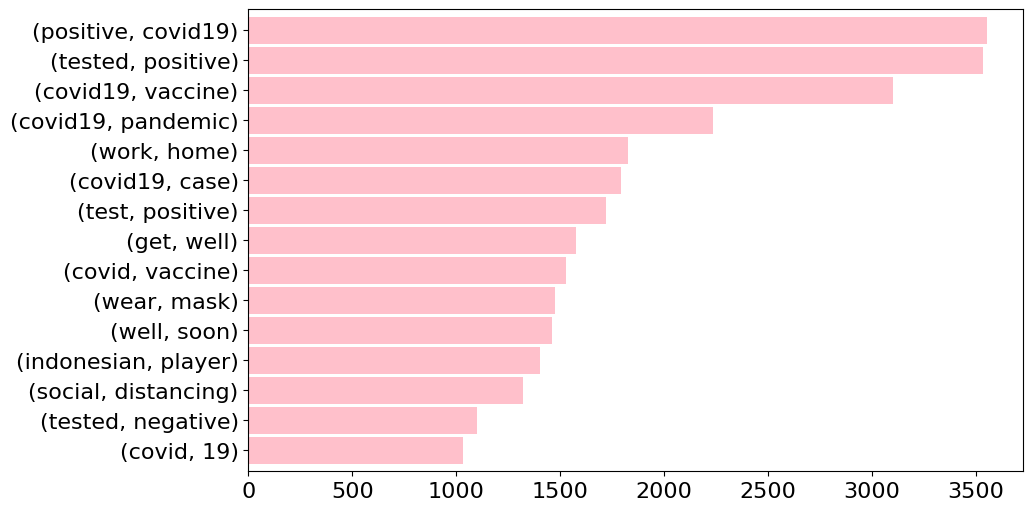

In [16]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]

bigrams_series.sort_values().plot.barh(color = 'pink', width = 0.9, figsize = (10, 6))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '(anonymous, passenger, test)'),
  Text(0, 1, '(2021, due, anonymous)'),
  Text(0, 2, '(england, 2021, due)'),
  Text(0, 3, '(breakingnnas, thing, stand)'),
  Text(0, 4, '(player, withdrawn, england)'),
  Text(0, 5, '(due, anonymous, passenger)'),
  Text(0, 6, '(withdrawn, england, 2021)'),
  Text(0, 7, '(xiumin, tested, positive)'),
  Text(0, 8, '(work, home, httpstcodiaqqwgrls)'),
  Text(0, 9, '(ixavieruncle, spiderman, work)'),
  Text(0, 10, '(spiderman, work, home)'),
  Text(0, 11, '(test, positive, covid19)'),
  Text(0, 12, '(indonesian, player, withdrawn)'),
  Text(0, 13, '(get, well, soon)'),
  Text(0, 14, '(tested, positive, covid19)')])

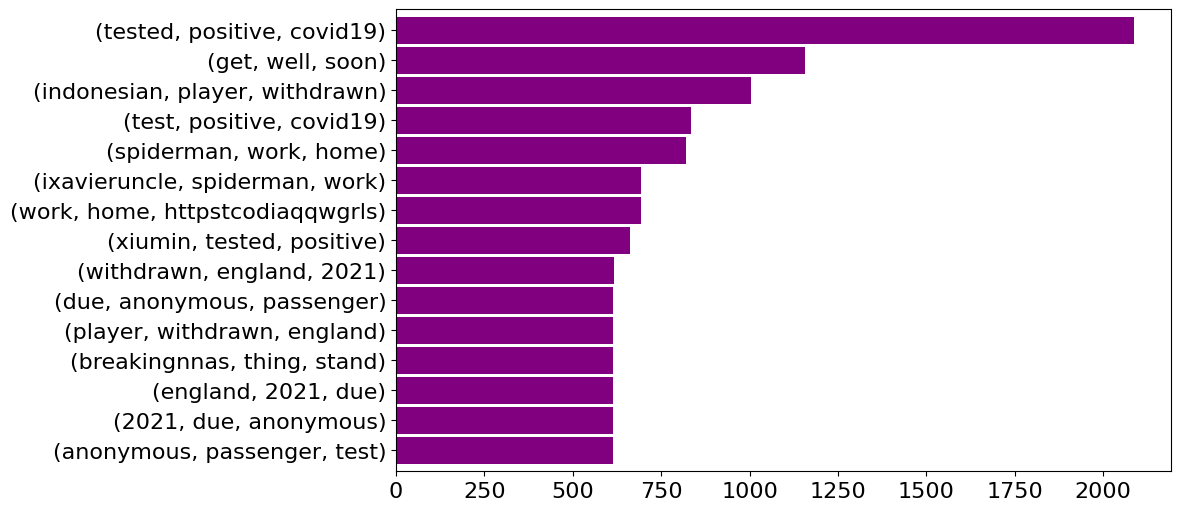

In [17]:
trigrams_series.sort_values().plot.barh(color = 'purple', width = 0.9, figsize = (10, 6))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

In [18]:
contractions = {
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not",
"couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have",
"hasn't": "has not", "haven't": "have not", "he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "i would", "i'd've": "i would have",
"i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
"it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us",
"ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
"mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
"shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she shall / she will",
"she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
"so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
"they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
"we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
"who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
"would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have",
"y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
"you're": "you are", "you've": "you have"
}

In [19]:
contractionsWithAnotherInvertedComma = {
"ain’t": "am not", "aren’t": "are not", "can’t": "cannot", "can’t’ve": "cannot have", "’cause": "because", "could’ve": "could have", "couldn’t": "could not",
"couldn’t’ve": "could not have", "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have",
"hasn’t": "has not", "haven’t": "have not", "he’d": "he had", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have", "he’s": "he is",
"how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "how’s": "how is", "i’d": "i would", "i’d’ve": "i would have",
"i’ll": "i will", "i’ll’ve": "i will have", "i’m": "i am", "i’ve": "i have", "isn’t": "is not", "it’d": "it would",
"it’d’ve": "it would have", "it’ll": "it will", "it’ll’ve": "it will have", "it’s": "it is", "let’s": "let us",
"ma’am": "madam", "mayn’t": "may not", "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not",
"mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock", "oughtn’t": "ought not", "oughtn’t’ve": "ought not have",
"shan’t": "shall not", "shan’t’ve": "shall not have", "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will",
"she’ll’ve": "she will have", "she’s": "she is", "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have",
"so’ve": "so have", "so’s": "so is", "that’d": "that would", "that’d’ve": "that would have", "that’s": "that is", "there’d": "there would",
"there’d’ve": "there would have", "there’s": "there is", "they’d": "they would", "they’d’ve": "they would have", "they’ll": "they will",
"they’ll’ve": "they will have", "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would",
"we’d’ve": "we would have", "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not", "what’ll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when’ve": "when have", "where’d": "where did", "where’s": "where is", "where’ve": "where have", "who’ll": "who will", "who’ll’ve": "who will have",
"who’s": "who is", "who’ve": "who have", "why’s": "why is", "why’ve": "why have", "will’ve": "will have", "won’t": "will not", "won’t’ve": "will not have",
"would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have",
"y’all’re": "you all are", "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have",
"you’re": "you are", "you’ve": "you have"
}

In [20]:
class preprocess():
    def __init__(self, df, contractions, otherContractions):
        self.df = df
        self.contractions = contractions
        self.otherContractions = otherContractions

    def lower(self, tweet):
        return tweet.lower()

    def expand(self, tweet):
        for word in tweet.split():
            if word in self.contractions.keys():
                tweet = tweet.replace(word, self.contractions[word])
            elif word in self.otherContractions.keys():
                tweet = tweet.replace(word, self.otherContractions[word])
        return tweet

    def emoji2text(self, tweet):
        emojis = demoji.findall(tweet)
        new_tweet = []
        for word in tweet.split():
            if word in emojis.keys():
                tweet = tweet.replace(word, emojis[word])
                new_tweet.append(emojis[word])
            wordmojis = demoji.findall(word)
            for char in word:
                if char in wordmojis.keys():
                    tweet = tweet.replace(word, wordmojis[char])

        return tweet

    def remove_hashtags(self, tweet):
        return re.sub(r'\#w+', '', tweet)

    def remove_mentions(self, tweet):
        for word in tweet.split():
            if word[0] == '@':
                tweet = tweet.replace(word, '')
        return tweet

    def remove_punctuations(self, tweet):
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')
        return tweet.translate(trantab)

    def preprocess_tweet(self, tweet):
        tweet = str(tweet).lower()
        tweet = self.expand(tweet)
        tweet = self.emoji2text(tweet)
        tweet = self.remove_mentions(tweet)
        tweet = self.remove_hashtags(tweet)
        tweet = self.remove_punctuations(tweet)
        return tweet

In [21]:
pp_class = preprocess(senwave_japan, contractions, contractionsWithAnotherInvertedComma)
senwave_japan['text'] = senwave_japan['text'].apply(lambda x : pp_class.preprocess_tweet(x))

In [22]:
senwave_japan

created_at                     id  \
0      2021-12-08 04:26:24+00:00  1468436777123807232.0   
1      2021-12-08 04:28:11+00:00  1468437225574526976.0   
2      2021-12-08 04:28:28+00:00  1468437299008442368.0   
3      2021-12-08 04:29:10+00:00  1468437474003206144.0   
5      2021-12-08 04:29:50+00:00  1468437641846669312.0   
...                          ...                    ...   
229930 2020-08-21 22:50:19+00:00    1296942738546536449   
229931 2020-08-21 22:50:23+00:00    1296942756414144513   
229932 2020-08-21 22:50:34+00:00    1296942799258968065   
229933 2020-08-21 22:50:31+00:00    1296942790396452864   
229934 2020-08-21 22:50:43+00:00    1296942840702853120   

                                                     text  \
0         covid 19 has slowed many economies around th...   
1       rt  aespa received  2021 visionary awards  for...   
2       rt  omicron does not spread through surfaces\n...   
3       hopefully im win  still believe  for long term...   
5       rt  middle of a pandemic  amp   is mandating t...   
...                                                   ...   
229930  rt  the silent suffering of indonesia’s forest...   
229931  rt  type  during quarantine  i learned how to”...   
229932  rt  three years ago today  millions of people ...   
229933  rt  why did we expect aged care to cope amid c...   
229934  you have to add indonesia with usa https   t c...   

                        user_location  
0                           Indonesia  
1          Kota Batam, Kepulauan Riau  
2                   Bekasi, Indonesia  
3              Bogor Barat, Indonesia  
5              Jakarta Capital Region  
...                               ...  
229930  London, Norfolk, Bali, Borneo  
229931   Jakarta Selatan, DKI Jakarta  
229932             Malang, Jawa Timur  
229933                Bali, Indonesia  
229934                 Jakarta.  Bali  

[185067 rows x 4 columns]

In [23]:
def word_replace(tweet):
  tweet = tweet.replace("indiavscorona", "india versus coronavirus")
  tweet = tweet.replace("outbreakindia", "outbreak india")
  tweet = tweet.replace("real”", "real")
  tweet = tweet.replace("mutra", "urine")
  tweet = tweet.replace("fakenews", "fake news")
  tweet = tweet.replace("“omg", "oh my god")
  tweet = tweet.replace("“damn", "damn")
  tweet = tweet.replace("god’s", "gods")
  tweet = tweet.replace("lockdownextension", "lockdown extension")
  tweet = tweet.replace("कोरोना", "coronavirus")
  tweet = tweet.replace("indiathanks", "india thanks")
  tweet = tweet.replace("coronacoronavirus", "coronavirus")
  tweet = tweet.replace('coronavirusinsa', "coronavirus in south africa")
  tweet = tweet.replace('coronaviruscanada', 'coronavirus canada')
  tweet = tweet.replace('coronavirusau', 'coronavirus australia')
  tweet = tweet.replace('coronavirusaus', 'coronavirus australia')
  tweet = tweet.replace('cuomoprimetime', 'new york governor prime time')
  tweet = tweet.replace('letsfightcoronavirus', 'let us fight coronavirus')
  tweet = tweet.replace("covid19", "coronavirus")
  tweet = tweet.replace("covid", "coronavirus")
  tweet = tweet.replace("aprilfoolsday", "april fools day")
  tweet = tweet.replace("covidー19", "coronavirus")
  tweet = tweet.replace("stayathome", "stay at home")
  tweet = tweet.replace("“april", "april")
  tweet = tweet.replace("“i", "i")
  tweet = tweet.replace("aprilfools", "april fools")
  tweet = tweet.replace("coronavirusoutbreak", "coronavirus outbreak")
  tweet = tweet.replace("virusー19", "coronavirus")
  tweet = tweet.replace("fool’s", "fools")
  tweet = tweet.replace("what’s", "what is")
  tweet = tweet.replace("coronavirus”", "coronavirus")
  tweet = tweet.replace("fools”", "fools")
  tweet = tweet.replace("stayhome", "stay home")
  tweet = tweet.replace("quarantinelife", "quarantine life")
  tweet = tweet.replace("tablighijamaat", "muslims")
  tweet = tweet.replace("corona”", "coronavirus")
  tweet = tweet.replace("fauci", "physician")
  tweet = tweet.replace("april’s", "april")
  tweet = tweet.replace("pmkcallscurfewextension", "prime minister calls for curfew extension")
  tweet = tweet.replace("“virus", "coronavirus")
  tweet = tweet.replace("virus”", "coronavirus")
  tweet = tweet.replace("“corona", "coronavirus")
  tweet = tweet.replace("coronavirustruth", "coronavirus truth")
  tweet = tweet.replace("socialdistancing", "social distancing")
  tweet = tweet.replace("homestaysafe", "home stay safe")
  tweet = tweet.replace("“coronavirus", "coronavirus")
  tweet = tweet.replace("coronavirusupdate", "coronavirus update")
  tweet = tweet.replace("virusvirus", "coronavirus")
  tweet = tweet.replace("coronaviruspandemic", "coronavirus pandemic")
  tweet = tweet.replace("thelockdown", "the lockdown")
  tweet = tweet.replace("nizamuddin", "delhi")
  tweet = tweet.replace("trump’s", "donald trump")
  tweet = tweet.replace("“the", "the")
  tweet = tweet.replace("virus2019", "coronavirus")
  tweet = tweet.replace("indiafightscorona", "india fights coronavirus")
  tweet = tweet.replace("homesavelives", "home save lives")
  tweet = tweet.replace("everyone’s", "everyone")
  tweet = tweet.replace("coronariskforprisoners", "coronavirus risk for prisoners")
  tweet = tweet.replace("coronavirususa", "coronavirus usa")
  tweet = tweet.replace("tablighi", "mosque")
  tweet = tweet.replace("delhimarkaz", "delhi mosque")
  tweet = tweet.replace("coronajihad", "coronavirus struggle")
  tweet = tweet.replace("coronajihaad", "coronavirus struggle")
  tweet = tweet.replace("aprilfool", "april fool")
  tweet = tweet.replace("trumppressconference", "trump press conference")
  tweet = tweet.replace("i’m", "i am")
  tweet = tweet.replace("tigerking", "tiger king")
  tweet = tweet.replace("it’s", "it is")
  tweet = tweet.replace("trumpvirus", "trump virus")
  tweet = tweet.replace("today’s", "today is")
  tweet = tweet.replace("“you", "you")
  tweet = tweet.replace("“a", "a")
  tweet = tweet.replace("fools’", "fools")
  tweet = tweet.replace("rtgnews", "news")
  tweet = tweet.replace("19india", "india")
  tweet = tweet.replace("coronavirusindia", "coronavirus india")
  tweet = tweet.replace("y’all", "you all")
  tweet = tweet.replace("मीडिया", "media")
  tweet = tweet.replace("here’s", "here is")
  tweet = tweet.replace("“we", "we")
  tweet = tweet.replace("“fuck", "fuck")
  tweet = tweet.replace("flattenthecurve", "flatten the curve")
  tweet = tweet.replace("jammuandkashmir", "jammu and kashmir")
  tweet = tweet.replace("chriscuomo", "new york governor")
  tweet = tweet.replace("‘april", "april")
  tweet = tweet.replace("dranbumani", "doctor")
  tweet = tweet.replace("tndemandsmasstesting", "tamil nadu demands mass testing")
  tweet = tweet.replace("tabligi", "muslims")
  tweet = tweet.replace("don’t", "do not")
  tweet = tweet.replace("वायरस", "virus")
  tweet = tweet.replace("letsfightvirus", "let us fight virus")
  return tweet

In [24]:
senwave_japan['text'] = senwave_japan['text'].apply(lambda x : word_replace(x))

In [25]:
# from google.colab import files
# senwave_japan.to_csv('senwave_japan.csv')
# files.download('senwave_japan.csv')

In [26]:
senwave_japan

created_at                     id  \
0      2021-12-08 04:26:24+00:00  1468436777123807232.0   
1      2021-12-08 04:28:11+00:00  1468437225574526976.0   
2      2021-12-08 04:28:28+00:00  1468437299008442368.0   
3      2021-12-08 04:29:10+00:00  1468437474003206144.0   
5      2021-12-08 04:29:50+00:00  1468437641846669312.0   
...                          ...                    ...   
229930 2020-08-21 22:50:19+00:00    1296942738546536449   
229931 2020-08-21 22:50:23+00:00    1296942756414144513   
229932 2020-08-21 22:50:34+00:00    1296942799258968065   
229933 2020-08-21 22:50:31+00:00    1296942790396452864   
229934 2020-08-21 22:50:43+00:00    1296942840702853120   

                                                     text  \
0         coronavirus 19 has slowed many economies aro...   
1       rt  aespa received  2021 visionary awards  for...   
2       rt  omicron does not spread through surfaces\n...   
3       hopefully im win  still believe  for long term...   
5       rt  middle of a pandemic  amp   is mandating t...   
...                                                   ...   
229930  rt  the silent suffering of indonesia’s forest...   
229931  rt  type  during quarantine  i learned how to”...   
229932  rt  three years ago today  millions of people ...   
229933  rt  why did we expect aged care to cope amid c...   
229934  you have to add indonesia with usa https   t c...   

                        user_location  
0                           Indonesia  
1          Kota Batam, Kepulauan Riau  
2                   Bekasi, Indonesia  
3              Bogor Barat, Indonesia  
5              Jakarta Capital Region  
...                               ...  
229930  London, Norfolk, Bali, Borneo  
229931   Jakarta Selatan, DKI Jakarta  
229932             Malang, Jawa Timur  
229933                Bali, Indonesia  
229934                 Jakarta.  Bali  

[185067 rows x 4 columns]

In [27]:
stop_words = stopwords.words('english') + ['t', 'rt', 'ti', 'vk', 'to', 'co','dqlw', 'z', 'nd', 'm', 's', 'kur', 'u', 'o', 'd', 'http', 'https']
senwave_japan['text'] = senwave_japan['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [28]:
senwave_japan

created_at                     id  \
0      2021-12-08 04:26:24+00:00  1468436777123807232.0   
1      2021-12-08 04:28:11+00:00  1468437225574526976.0   
2      2021-12-08 04:28:28+00:00  1468437299008442368.0   
3      2021-12-08 04:29:10+00:00  1468437474003206144.0   
5      2021-12-08 04:29:50+00:00  1468437641846669312.0   
...                          ...                    ...   
229930 2020-08-21 22:50:19+00:00    1296942738546536449   
229931 2020-08-21 22:50:23+00:00    1296942756414144513   
229932 2020-08-21 22:50:34+00:00    1296942799258968065   
229933 2020-08-21 22:50:31+00:00    1296942790396452864   
229934 2020-08-21 22:50:43+00:00    1296942840702853120   

                                                     text  \
0       coronavirus 19 slowed many economies around wo...   
1       aespa received 2021 visionary awards people pl...   
2       omicron spread surfaces end hysteria washing g...   
3       hopefully im win still believe long term asset...   
5       middle pandemic amp mandating sick employees c...   
...                                                   ...   
229930  silent suffering indonesia’s forests pandemic ...   
229931  type quarantine learned to” tap center predict...   
229932  three years ago today millions people us saw s...   
229933  expect aged care cope amid coronavirus struggl...   
229934                       add indonesia usa l1dwdmhqkh   

                        user_location  
0                           Indonesia  
1          Kota Batam, Kepulauan Riau  
2                   Bekasi, Indonesia  
3              Bogor Barat, Indonesia  
5              Jakarta Capital Region  
...                               ...  
229930  London, Norfolk, Bali, Borneo  
229931   Jakarta Selatan, DKI Jakarta  
229932             Malang, Jawa Timur  
229933                Bali, Indonesia  
229934                 Jakarta.  Bali  

[185067 rows x 4 columns]

In [29]:
# Subset data based on timeframes for alpha, delta and omicron

In [30]:
total_japan = senwave_japan.copy()

In [31]:
print(total_japan[total_japan['created_at'] < '2022-01-01']['created_at'].min())

first_wave = total_japan[(total_japan['created_at'] >= '2020-04-01') & (total_japan['created_at'] <= '2021-01-31')]
second_wave = total_japan[(total_japan['created_at'] >= '2021-03-01') & (total_japan['created_at'] < '2021-06-30')]
third_wave = total_japan[(total_japan['created_at'] >= '2022-01-01') & (total_japan['created_at'] < '2022-02-28')]

print(first_wave.shape, second_wave.shape, third_wave.shape)

2020-04-27 04:49:00+00:00
(16674, 4) (36503, 4) (2472, 4)


In [32]:
# First Wave

In [33]:
# Tokenizing

freqX = pd.Series(' '.join(first_wave['text']).split()).value_counts()[:10]

print('FREQ X: \n', freqX)

FREQ X: 
 coronavirus    9467
19             3341
pandemic       1465
new            1074
amp            1035
cases           949
face            856
indonesia       855
corona          847
us              839
dtype: int64


In [34]:
first_wave['text'] = first_wave['text'].apply(lambda x: [item for item in x.split()])
first_wave['text']

<ipython-input-34-287160392d99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_wave['text'] = first_wave['text'].apply(lambda x: [item for item in x.split()])


208872    [singapore, emerging, region’s, highest, numbe...
208873    [indonesia, reallocate, resources, help, low, ...
208874    [india, buy, chinese, rapid, testing, kits, co...
208875    [thinking”, coronavirus, 19, exposes, mathemat...
208876    [access, regency, indonesia, difficult, reside...
                                ...                        
229930    [silent, suffering, indonesia’s, forests, pand...
229931    [type, quarantine, learned, to”, tap, center, ...
229932    [three, years, ago, today, millions, people, u...
229933    [expect, aged, care, cope, amid, coronavirus, ...
229934                    [add, indonesia, usa, l1dwdmhqkh]
Name: text, Length: 16674, dtype: object

In [35]:
sentence_list = [sent for sent in first_wave['text']]
print(sentence_list[:10])

[['singapore', 'emerging', 'region’s', 'highest', 'number', 'coronavirus', 'cases', 'world’s', 'two', 'populous', 'countries…'], ['indonesia', 'reallocate', 'resources', 'help', 'low', 'income', 'workers', 'coronavirus', 'pandemic', 'instead', 'building', 'cou…'], ['india', 'buy', 'chinese', 'rapid', 'testing', 'kits', 'coronavirus', 'countries', 'complained', 'accuracy', 't…'], ['thinking”', 'coronavirus', '19', 'exposes', 'mathematics', 'education', 'inadequacies', 'modicum', 'secret', 'relief', 'for…'], ['access', 'regency', 'indonesia', 'difficult', 'residents', 'allegedly', 'free', 'corona', '0ptpyhffgn'], ['thousands', 'animals', 'living', 'indonesia', '55', 'zoos', 'facing', 'threat', 'famine', 'management', 'struggles', 'afford', 'an…'], ['sadgirl', 'bnzqxjfiie'], ['one', 'coronavirus', 'ramadhan', 'temen', 'ane', 'r0xmezblbj'], ['us', 'traffic', 'coronavirus', '19', 'mapping', 'infographic', 'fhjg2jxivx', 'earnmoney', 'businessopportunity', 'earn', 'eb', 'ealthyaff…'], ['us', 

In [36]:
word_list = [sent for sent in sentence_list]
print(word_list[:10])

[['singapore', 'emerging', 'region’s', 'highest', 'number', 'coronavirus', 'cases', 'world’s', 'two', 'populous', 'countries…'], ['indonesia', 'reallocate', 'resources', 'help', 'low', 'income', 'workers', 'coronavirus', 'pandemic', 'instead', 'building', 'cou…'], ['india', 'buy', 'chinese', 'rapid', 'testing', 'kits', 'coronavirus', 'countries', 'complained', 'accuracy', 't…'], ['thinking”', 'coronavirus', '19', 'exposes', 'mathematics', 'education', 'inadequacies', 'modicum', 'secret', 'relief', 'for…'], ['access', 'regency', 'indonesia', 'difficult', 'residents', 'allegedly', 'free', 'corona', '0ptpyhffgn'], ['thousands', 'animals', 'living', 'indonesia', '55', 'zoos', 'facing', 'threat', 'famine', 'management', 'struggles', 'afford', 'an…'], ['sadgirl', 'bnzqxjfiie'], ['one', 'coronavirus', 'ramadhan', 'temen', 'ane', 'r0xmezblbj'], ['us', 'traffic', 'coronavirus', '19', 'mapping', 'infographic', 'fhjg2jxivx', 'earnmoney', 'businessopportunity', 'earn', 'eb', 'ealthyaff…'], ['us', 

In [37]:
# Lemmatization

lemmatizer = WordNetLemmatizer()
word_list_lematized = []

for w in word_list:
    word_list_lematized.append([lemmatizer.lemmatize(x) for x in w])
print(word_list_lematized[:10])

[['singapore', 'emerging', 'region’s', 'highest', 'number', 'coronavirus', 'case', 'world’s', 'two', 'populous', 'countries…'], ['indonesia', 'reallocate', 'resource', 'help', 'low', 'income', 'worker', 'coronavirus', 'pandemic', 'instead', 'building', 'cou…'], ['india', 'buy', 'chinese', 'rapid', 'testing', 'kit', 'coronavirus', 'country', 'complained', 'accuracy', 't…'], ['thinking”', 'coronavirus', '19', 'expose', 'mathematics', 'education', 'inadequacy', 'modicum', 'secret', 'relief', 'for…'], ['access', 'regency', 'indonesia', 'difficult', 'resident', 'allegedly', 'free', 'corona', '0ptpyhffgn'], ['thousand', 'animal', 'living', 'indonesia', '55', 'zoo', 'facing', 'threat', 'famine', 'management', 'struggle', 'afford', 'an…'], ['sadgirl', 'bnzqxjfiie'], ['one', 'coronavirus', 'ramadhan', 'temen', 'ane', 'r0xmezblbj'], ['u', 'traffic', 'coronavirus', '19', 'mapping', 'infographic', 'fhjg2jxivx', 'earnmoney', 'businessopportunity', 'earn', 'eb', 'ealthyaff…'], ['u', 'traffic', 'coro

In [38]:
# ID and text for Topic models

In [39]:
# Create dictionary which contains Id and word
id2word = corpora.Dictionary(word_list_lematized)
corpus = [id2word.doc2bow(tweet) for tweet in word_list]

print(np.array(word_list).shape)
print(np.array(id2word).shape)
print(np.array(corpus).shape)

(16674,)
(24642,)
(16674,)


<ipython-input-39-5486978e3ee1>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(word_list).shape)
<ipython-input-39-5486978e3ee1>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(corpus).shape)


In [40]:
# LDA

In [41]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                            id2word=id2word,
                                            num_topics=7,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [42]:
# Show Topics

pprint(lda_model.show_topics(num_words=20, num_topics=-1, formatted=False))
print('-'*100)

pprint(lda_model.show_topics(formatted=True))
print('-'*100)

print('\nPerplexity: ', lda_model.log_perplexity(corpus))
print('-'*100)

doc_lda = lda_model[corpus]
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n LDA model Coherence Score/Accuracy on Tweets: ', coherence_lda)

[(0,
  [('amp', 0.064195685),
   ('new', 0.044630487),
   ('wonder', 0.03416494),
   ('life', 0.029320553),
   ('…', 0.024142383),
   ('take', 0.021124758),
   ('people', 0.019024877),
   ('else', 0.018514961),
   ('stand', 0.018245947),
   ('indonesia', 0.01816416),
   ('tune', 0.017954312),
   ('monday', 0.01794366),
   ('indonesia’s', 0.017533528),
   ('rest', 0.016405422),
   ('get', 0.015821876),
   ('digital', 0.013595497),
   ('000', 0.009598022),
   ('dynamitebts', 0.007968317),
   ('source', 0.0077891513),
   ('05', 0.007731288)]),
 (1,
  [('us', 0.046355855),
   ('face', 0.037357055),
   ('love', 0.027263971),
   ('hope', 0.026967606),
   ('future', 0.026447939),
   ('btsarmy', 0.024555119),
   ('song', 0.022986595),
   ('boy', 0.018964363),
   ('first', 0.017463082),
   ('good', 0.017148495),
   ('reason', 0.0154929515),
   ('w…', 0.011771082),
   ('day', 0.011591811),
   ('talked', 0.011171588),
   ('health', 0.011146624),
   ('steam', 0.010723101),
   ('year', 0.009592673)

In [43]:
# hyper parameter tuning - LDA model

In [44]:
# BERT Model

In [45]:
!pip install --upgrade bertopic[visualization]
from bertopic import BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 23.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.2 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039165 sha256=660e3c096fda37a7bdf79370ff0231528e80422a8282be117e2803e5b180bb86
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=cd649b401d9d7798

In [46]:
BERT_first_wave = total_japan[(total_japan['created_at'] >= '2020-04-01') & (total_japan['created_at'] <= '2021-01-31')]

In [47]:
bert_model = BERTopic(language="english")
topics, probabilities = bert_model.fit_transform(BERT_first_wave['text'])

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [48]:
bert_model.get_topic_freq().head()

Topic  Count
10      -1   4200
6        0    648
140      1    237
36       2    209
7        3    200

In [49]:
bert_model.get_topic(1)

[('learned', 0.06099674215065758),
 ('quarantine', 0.058670308553624644),
 ('use', 0.026912910027042998),
 ('get', 0.01802662429637403),
 ('data', 0.016910574501879293),
 ('good', 0.01651250078060986),
 ('make', 0.012730698307401627),
 ('dog', 0.01252156530747),
 ('day', 0.010284787118564509),
 ('okay', 0.010148150879836561)]

In [50]:
bert_model.visualize_topics()

In [51]:
bert_model.update_topics(BERT_first_wave['text'], topics, n_gram_range=(1, 2))

In [52]:
topics, probabilities = bert_model.fit_transform(BERT_first_wave['text'])

In [53]:
bert_model.visualize_topics()

In [54]:
bert_model.visualize_barchart(top_n_topics=6)

In [55]:
bert_model.visualize_hierarchy(top_n_topics=30)

In [56]:
!pip install top2vec
!pip install top2vec[sentence_encoders] --use-deprecated=legacy-resolver
!pip install top2vec[sentence_transformers]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.6 MB/s eta 0:00:00


In [57]:
import seaborn as sns
import networkx as nx
import umap

In [58]:
import json, os, re, time,regex
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from natsort import natsorted
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import unicodedata
import nltk
import csv
import string
import gensim

from pprint import pprint
from gensim import corpora

In [59]:
!pip install top2vec
!pip install top2vec[sentence_encoders] --use-deprecated=legacy-resolver
!pip install top2vec[sentence_transformers]

In [60]:
import seaborn as sns
import networkx as nx
import umap

In [61]:
!pip install git+https://github.com/scikit-learn-contrib/hdbscan.git

  Cloning https://github.com/scikit-learn-contrib/hdbscan.git to /tmp/pip-req-build-ebewspc1
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-learn-contrib/hdbscan.git /tmp/pip-req-build-ebewspc1
  Resolved https://github.com/scikit-learn-contrib/hdbscan.git to commit 98928d0c095715edc9584e7989bd8559673bc2f0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.34rc1-cp310-cp310-linux_x86_64.whl size=3039001 sha256=6cecd93eaed4a26bc5f1c47c769cbc2d238e785a624919d77976712540b0f51e
  Stored in directory: /tmp/pip-ephem-wheel-cache-2qe96xle/wheels/dd/9a/ab/564a6c3e58f76c492ab1104d636e794e2fe7b879ba02e344d2
Successfully built hdbscan
  Attempting uninstall: hdbscan
    Found existing installation: hdbscan 0.8.33
    Uninstalling hdbscan-0.8.33:
      Successfully uninstalled hdbscan-0.8.33


In [62]:
import hdbscan
from top2vec import Top2Vec

In [63]:
first_wave['text_'] = first_wave['text'].astype("string")

In [64]:
first_wave.dtypes

created_at       datetime64[ns, UTC]
id                            object
text                          object
user_location                 object
text_                         string
dtype: object

In [65]:
model_first = Top2Vec(first_wave['text_'].to_list(), embedding_model = 'universal-sentence-encoder')

2023-12-17 15:44:46,902 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-12-17 15:44:48,282 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-12-17 15:45:26,257 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-17 15:45:36,830 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-12-17 15:46:14,593 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-12-17 15:46:15,794 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [66]:
model_first.topic_words

array([['pandemic', 'epidemic', 'outbreak', ..., 'social', 'danger',
        'africa'],
       ['economy', 'crisis', 'economic', ..., 'first', 'fast', 'big'],
       ['corona', 'postponed', 'delayed', ..., 'crying', 'bali',
        'laughing'],
       ...,
       ['album', 'punk', 'band', ..., 'best', 'update', 'sad'],
       ['vaccine', 'quarantine', 'flu', ..., 'jobs', 'hand', 'lt'],
       ['flee', 'go', 'second', ..., 'canada', 'steam', 'wash']],
      dtype='<U13')

In [67]:
model_first.get_topic_sizes()

(array([523, 353, 322, 301, 296, 290, 283, 273, 267, 266, 251, 249, 245,
        210, 196, 193, 193, 178, 171, 169, 169, 162, 161, 159, 152, 147,
        138, 135, 126, 125, 123, 123, 118, 117, 115, 114, 114, 111, 110,
        108, 106, 102, 101, 100,  97,  96,  96,  95,  92,  92,  91,  89,
         89,  89,  85,  84,  79,  77,  77,  75,  75,  75,  72,  72,  72,
         71,  70,  70,  70,  70,  69,  68,  68,  67,  67,  67,  67,  67,
         66,  65,  65,  64,  64,  64,  63,  63,  61,  61,  61,  61,  61,
         60,  60,  60,  59,  59,  59,  59,  58,  58,  58,  57,  56,  55,
         54,  54,  54,  53,  53,  53,  52,  51,  51,  51,  50,  50,  50,
         49,  49,  49,  48,  48,  48,  48,  48,  47,  47,  46,  46,  46,
         46,  46,  46,  46,  45,  45,  45,  44,  44,  44,  44,  44,  44,
         43,  43,  43,  43,  42,  42,  39,  39,  38,  38,  38,  37,  37,
         37,  37,  37,  37,  35,  35,  35,  35,  35,  35,  34,  34,  34,
         34,  34,  34,  34,  33,  33,  33,  33,  33

In [68]:
topic_sizes, topic_nums = model_first.get_topic_sizes()

In [69]:
topic_words, word_scores, topic_nums = model_first.get_topics(20)

In [70]:
model_first_reduced= model_first.hierarchical_topic_reduction(num_topics = 10)

In [71]:
model_first.save("/content/model_first_reduced")

In [72]:
model_first_reduced= model_first.load("/content/model_first_reduced")

In [73]:
model_first.get_num_topics(reduced ="True")

10

In [74]:
def get_words(model, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = True
    if model.get_num_topics() > num_topics:
      reduced_topic_lists = model.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [75]:
words, _, _= get_words(model_first_reduced, 20, model_first_reduced.get_num_topics())
words_first, _, _ = get_words(model_first_reduced, 20, model_first_reduced.get_num_topics())
words_first

array([['postponed', 'donated', 'update', 'surabaya', 'official',
        'asean', 'positif', 'dybala', 'finally', 'event', 'updates',
        'wish', 'sure', 'need', 'fuck', 'already', 'outbreak', 'bts',
        'seoul', 'done'],
       ['trump', 'disaster', 'lockdown', 'pandemic', 'crisis', 'sars',
        'china', 'threat', 'epidemic', 'usa', 'outbreak', 'fuck',
        'emergency', 'iran', 'everyone', 'conspiracy', 'shit', 'kim',
        'said', 'loudly'],
       ['sars', 'outbreak', 'quarantine', 'vaccine', 'epidemic', 'flu',
        'pandemic', 'icu', 'virus', 'immunity', 'microbe', 'infected',
        'patient', 'nurses', 'patients', 'scientists', 'sick', 'tested',
        'doctors', 'hospital'],
       ['corona', 'fuck', 'sad', 'sars', 'postponed', 'loudly', 'scary',
        'flee', 'shit', 'delayed', 'outbreak', '재난문자', 'nasal',
        'suspected', 'cqaa', 'coronavirus', 'seriously', 'wrong',
        'matured', 'worst'],
       ['bts', 'jae', 'kim', 'seoul', 'tune', 'korean',

In [76]:
model_first.topic_words[21]

array(['fuck', 'shit', 'worst', 'seriously', 'cannot', 'sad', 'wrong',
       'suspected', 'loudly', 'scary', 'delayed', 'sars', 'imagine',
       'really', 'wonder', 'yesterday', 'seems', 'sick', 'wait', 'nasal',
       'hope', 'better', 'jae', 'invisible', 'stop', 'dear', 'closer',
       'thought', 'ramadan', 'positif', 'lee', 'think', 'folded',
       'possible', 'matured', 'never', 'believe', 'die', 'already',
       'discuss', 'interesting', 'least', 'breathe', 'learned', 'flee',
       'still', 'wish', 'laughing', 'negative', 'hard'], dtype='<U13')

In [77]:
# second wave

In [ ]:
second_wave['text_'] = second_wave['text'].astype("string")
model_second = Top2Vec(second_wave['text_'].to_list(), embedding_model = 'universal-sentence-encoder')
model_second.get_num_topics()

2023-12-17 15:47:13,141 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-12-17 15:47:21,303 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-12-17 15:47:29,303 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-17 15:47:41,580 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-12-17 15:48:56,301 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-12-17 15:49:01,041 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


411

In [ ]:
model_second.get_num_topics()

411

In [ ]:
# umap_args = {
#       "n_neighbors": 10,
#       "n_components": 2, # 5 -> 2 for plotting
#       "metric": "cosine",
#       "random_state":42
#       }
# umap_data = umap.UMAP(**umap_args).fit_transform(model_second._get_document_vectors(norm=False))

In [ ]:
model_second.get_topic_sizes()

(array([971, 695, 627, 524, 509, 480, 477, 463, 462, 417, 414, 404, 379,
        362, 342, 339, 318, 308, 293, 280, 275, 272, 266, 266, 225, 224,
        220, 219, 218, 218, 218, 216, 215, 215, 210, 209, 209, 209, 207,
        202, 202, 200, 198, 193, 192, 190, 186, 184, 176, 174, 174, 169,
        166, 162, 158, 155, 155, 150, 146, 146, 144, 143, 142, 141, 137,
        137, 137, 136, 134, 134, 132, 132, 127, 126, 124, 124, 124, 124,
        123, 120, 119, 119, 119, 115, 114, 113, 113, 111, 110, 109, 108,
        108, 107, 107, 105, 104, 103, 102, 102, 101, 101, 100,  99,  98,
         97,  96,  96,  96,  95,  95,  93,  92,  91,  91,  90,  90,  89,
         87,  87,  86,  84,  84,  83,  82,  81,  81,  81,  80,  80,  79,
         78,  78,  78,  77,  74,  74,  74,  73,  72,  71,  71,  70,  69,
         69,  69,  69,  68,  68,  68,  67,  67,  67,  66,  66,  66,  65,
         65,  65,  65,  65,  65,  64,  64,  64,  64,  64,  64,  63,  63,
         62,  62,  62,  62,  62,  62,  62,  62,  61

In [ ]:
topic_sizes, topic_nums = model_second.get_topic_sizes()

In [ ]:
topic_words, word_scores, topic_nums = model_second.get_topics(20)

In [ ]:
model_second.get_topics(20)

(array([['pandemic', 'epidemic', 'outbreak', 'sars', 'quarantine', 'cdc',
         'flu', 'risk', 'deadly', 'crisis', 'virus', 'viruses', 'disease',
         'vaccinated', 'fever', 'vaccine', 'deaths', 'wayv', 'warns',
         'vaccinations', 'vaccination', 'sanitizer', 'orang', 'vaccines',
         'immune', 'isolation', 'zombie', 'infected', 'paracetamol',
         'loudly', 'population', 'pfizer', 'isolate', 'stress',
         'solidarity', 'alone', 'herd', 'postponed', 'hospitalized',
         'yunho', 'kombucha', 'drama', 'asean', 'ivermectin', 'die',
         'worried', 'borneo', 'death', 'everyone', 'listened'],
        ['vaccinated', 'vaccines', 'vaccinations', 'vaccine',
         'vaccination', 'immunity', 'jab', 'cdc', 'immune', 'antibodies',
         'shots', 'sars', 'flu', 'quarantine', 'pandemic', 'syringe',
         'outbreak', 'viruses', 'anti', 'protocols', 'epidemic',
         'sputnik', 'pfizer', 'disease', 'ivermectin', 'virus', 'fever',
         'bottle', 'infected

In [ ]:
model_second_reduced= model_second.hierarchical_topic_reduction(num_topics = 10)

In [ ]:
model_second.save("/content/model_first_reduced")

In [ ]:
model_second_reduced= model_second.load("/content/model_first_reduced")

In [ ]:
def get_words(model_second, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = True
    if model_second.get_num_topics() > num_topics:
      reduced_topic_lists = model_second.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model_second.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [ ]:
words_second, _, _= get_words(model_second_reduced, 20, model_second_reduced.get_num_topics())
words_second

array([['sars', 'quarantine', 'epidemic', 'lockdown', 'positif',
        'hospitalized', 'worried', 'positive', 'warns', 'hiv',
        'outbreak', 'pandemic', 'retest', 'immune', 'strict', 'baekhyun',
        'jokowi', 'update', 'borneo', 'failed'],
       ['vaccine', 'vaccines', 'vaccinations', 'vaccinated',
        'vaccination', 'cdc', 'jab', 'shots', 'antibodies', 'immune',
        'immunity', 'flu', 'sars', 'outbreak', 'quarantine', 'pandemic',
        'syringe', 'pfizer', 'sputnik', 'epidemic'],
       ['pandemic', 'quarantine', 'epidemic', 'outbreak', 'sars', 'cdc',
        'flu', 'crisis', 'virus', 'viruses', 'vaccinated', 'risk',
        'deadly', 'infected', 'vaccinations', 'zombie', 'disease',
        'vaccine', 'fever', 'vaccination'],
       ['junghwan', 'sad', 'unfair', 'pyutdekblr', 'sinovac', 'poorer',
        'struggling', 'violating', 'shame', 'covax', 'warns', 'ugm',
        'condolences', 'sars', 'fuck', 'postponed', 'ateez', 'pregnant',
        'severe', 'bad'],
 

In [ ]:
words, _, _= get_words(model_second, 20, model_second.get_num_topics())
words_second, _, _ = get_words(model_second, 20, model_second.get_num_topics(reduced = 'True'))
words_second

array([['sars', 'quarantine', 'epidemic', 'lockdown', 'positif',
        'hospitalized', 'worried', 'positive', 'warns', 'hiv',
        'outbreak', 'pandemic', 'retest', 'immune', 'strict', 'baekhyun',
        'jokowi', 'update', 'borneo', 'failed'],
       ['vaccine', 'vaccines', 'vaccinations', 'vaccinated',
        'vaccination', 'cdc', 'jab', 'shots', 'antibodies', 'immune',
        'immunity', 'flu', 'sars', 'outbreak', 'quarantine', 'pandemic',
        'syringe', 'pfizer', 'sputnik', 'epidemic'],
       ['pandemic', 'quarantine', 'epidemic', 'outbreak', 'sars', 'cdc',
        'flu', 'crisis', 'virus', 'viruses', 'vaccinated', 'risk',
        'deadly', 'infected', 'vaccinations', 'zombie', 'disease',
        'vaccine', 'fever', 'vaccination'],
       ['junghwan', 'sad', 'unfair', 'pyutdekblr', 'sinovac', 'poorer',
        'struggling', 'violating', 'shame', 'covax', 'warns', 'ugm',
        'condolences', 'sars', 'fuck', 'postponed', 'ateez', 'pregnant',
        'severe', 'bad'],
 

In [ ]:
# third wave

In [ ]:
third_wave['text_'] = third_wave['text'].astype("string")
model_third = Top2Vec(third_wave['text_'].to_list(), embedding_model = 'universal-sentence-encoder')
model_third.get_num_topics()

2023-12-17 15:54:04,314 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-12-17 15:54:04,453 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-12-17 15:54:10,589 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-17 15:54:11,564 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-12-17 15:54:33,792 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-12-17 15:54:33,863 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


39

In [ ]:
# umap_args = {'n_neighbors': 10,
#              'n_components': 5,
#              'metric': 'cosine',
#              "random_state": 42
#              }
# hdbscan_args = {'min_cluster_size': 10,
#                 'min_samples':5,
#                 'metric': 'euclidean',
#                 'cluster_selection_method': 'eom'
#              }
# model_third = Top2Vec(documents = third_wave['text_'].to_list(), embedding_model='distiluse-base-multilingual-cased', umap_args = umap_args, hdbscan_args = hdbscan_args)
# model_third.get_num_topics()

In [ ]:
model_third.get_num_topics()

39

In [ ]:
# umap_args = {
#       "n_neighbors": 10,
#       "n_components": 2, # 5 -> 2 for plotting
#       "metric": "cosine",
#       "random_state":42
#       }
# umap_data = umap.UMAP(**umap_args).fit_transform(model_second._get_document_vectors(norm=False))

In [ ]:
model_third.get_topic_sizes()

(array([486, 124, 121, 116, 102,  93,  81,  75,  73,  73,  69,  64,  59,
         57,  54,  50,  45,  44,  41,  41,  38,  37,  36,  36,  36,  36,
         35,  35,  34,  33,  33,  31,  29,  29,  29,  27,  27,  23,  20]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]))

In [ ]:
topic_sizes, topic_nums = model_third.get_topic_sizes()

In [ ]:
topic_words, word_scores, topic_nums = model_third.get_topics(16)

In [ ]:
model_third.get_topics(16)

(array([['nightclub', 'club', 'restrictions', 'pcr', 'rage', 'tests',
         'jan', 'tested', 'coronavirus', 'quarantine', 'vaccine',
         'hosting', 'psg', 'opening', 'bts', 'metaverse', 'pandemic',
         'chelsea', 'cases', 'delta', 'party', 'causes', 'positive',
         'well', 'omicron', 'first', 'study', 'news', 'amp', 'ah', 'soon',
         'liverpool', 'new', 'less', 'us', 'breaking', 'good',
         'squinting', 'year', 'severe', 'one', 'square', 'indonesia',
         'black', 'face', 'disease', 'hospitalized', 'get', 'like',
         'significantly'],
        ['pandemic', 'quarantine', 'disease', 'vaccine', 'hospitalized',
         'severe', 'party', 'first', 'rage', 'well', 'omicron',
         'indonesia', 'psg', 'new', 'ah', 'news', 'breaking', 'pcr',
         'nightclub', 'us', 'cases', 'study', 'good', 'significantly',
         'opening', 'coronavirus', 'metaverse', 'notice', 'people', 'bts',
         'year', 'squinting', 'full', 'today', 'jan', 'delta', 'cat',


In [ ]:
model_third_reduced= model_third.hierarchical_topic_reduction(num_topics = 10)

In [ ]:
model_third.save("/content/model_first_reduced")

In [ ]:
model_third_reduced = model_third.load("/content/model_first_reduced")

In [ ]:
def get_words(model_third, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = True
    if model_third.get_num_topics() > num_topics:
      reduced_topic_lists = model_third.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model_third.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [ ]:
words_third, _, _= get_words(model_third_reduced, 20, model_third_reduced.get_num_topics())
words_third

array([['nightclub', 'club', 'restrictions', 'pcr', 'rage', 'tests',
        'jan', 'tested', 'coronavirus', 'quarantine', 'vaccine',
        'hosting', 'psg', 'opening', 'bts', 'metaverse', 'pandemic',
        'chelsea', 'cases', 'delta'],
       ['messi', 'psg', 'chelsea', 'liverpool', 'lionel', 'positive',
        'tested', 'bts', 'tests', 'jan', 'delta', 'news', 'well', 'good',
        'grinning', 'even', 'coronavirus', 'first', 'today',
        'significantly'],
       ['good', 'project', 'recovery', 'hospitalized', 'soon',
        'positive', 'breaking', 'suga', 'ah', 'rage', 'grinning', 'bts',
        'severe', 'yoongi', 'news', 'get', 'look', 'new', 'chelsea',
        'study'],
       ['pandemic', 'quarantine', 'hospitalized', 'disease', 'vaccine',
        'severe', 'significantly', 'study', 'patients', 'delta', 'well',
        'omicron', 'news', 'less', 'ah', 'new', 'us', 'good',
        'indonesia', 'rage'],
       ['vaccine', 'quarantine', 'pandemic', 'coronavirus', 'disease

In [ ]:
words, _, _= get_words(model_third, 20, model_third.get_num_topics())
words_third, _, _ = get_words(model_third, 20, model_third.get_num_topics(reduced = 'True'))
words_third

array([['nightclub', 'club', 'restrictions', 'pcr', 'rage', 'tests',
        'jan', 'tested', 'coronavirus', 'quarantine', 'vaccine',
        'hosting', 'psg', 'opening', 'bts', 'metaverse', 'pandemic',
        'chelsea', 'cases', 'delta'],
       ['messi', 'psg', 'chelsea', 'liverpool', 'lionel', 'positive',
        'tested', 'bts', 'tests', 'jan', 'delta', 'news', 'well', 'good',
        'grinning', 'even', 'coronavirus', 'first', 'today',
        'significantly'],
       ['good', 'project', 'recovery', 'hospitalized', 'soon',
        'positive', 'breaking', 'suga', 'ah', 'rage', 'grinning', 'bts',
        'severe', 'yoongi', 'news', 'get', 'look', 'new', 'chelsea',
        'study'],
       ['pandemic', 'quarantine', 'hospitalized', 'disease', 'vaccine',
        'severe', 'significantly', 'study', 'patients', 'delta', 'well',
        'omicron', 'news', 'less', 'ah', 'new', 'us', 'good',
        'indonesia', 'rage'],
       ['vaccine', 'quarantine', 'pandemic', 'coronavirus', 'disease

In [ ]:
topic_vectors_firstwave = model_first_reduced.topic_vectors_reduced
topic_vectors_thirdwave = model_third_reduced.topic_vectors_reduced
print(topic_vectors_firstwave.shape, topic_vectors_thirdwave.shape)

(10, 512) (10, 512)


In [ ]:
topic_vectors_secondwave = model_second_reduced.topic_vectors_reduced
topic_vectors_thirdwave = model_third_reduced.topic_vectors_reduced
print(topic_vectors_firstwave.shape, topic_vectors_thirdwave.shape)

(10, 512) (10, 512)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(topic_vectors_secondwave, topic_vectors_thirdwave)
most_similar = similarity_matrix.argmax(axis=1)

In [ ]:
def bipartite_to_adjacency(A):
     m, n = A.shape
     Z_mm = np.zeros((m,m), dtype=int)
     Z_nn = np.zeros((n,n), dtype=int)
     top_partition = np.concatenate((Z_nn,np.transpose(A)), axis=1)
     bottom_partition = np.concatenate((A,Z_mm), axis=1)
     return np.concatenate((top_partition, bottom_partition))
sim_G = nx.to_networkx_graph(bipartite_to_adjacency(similarity_matrix))

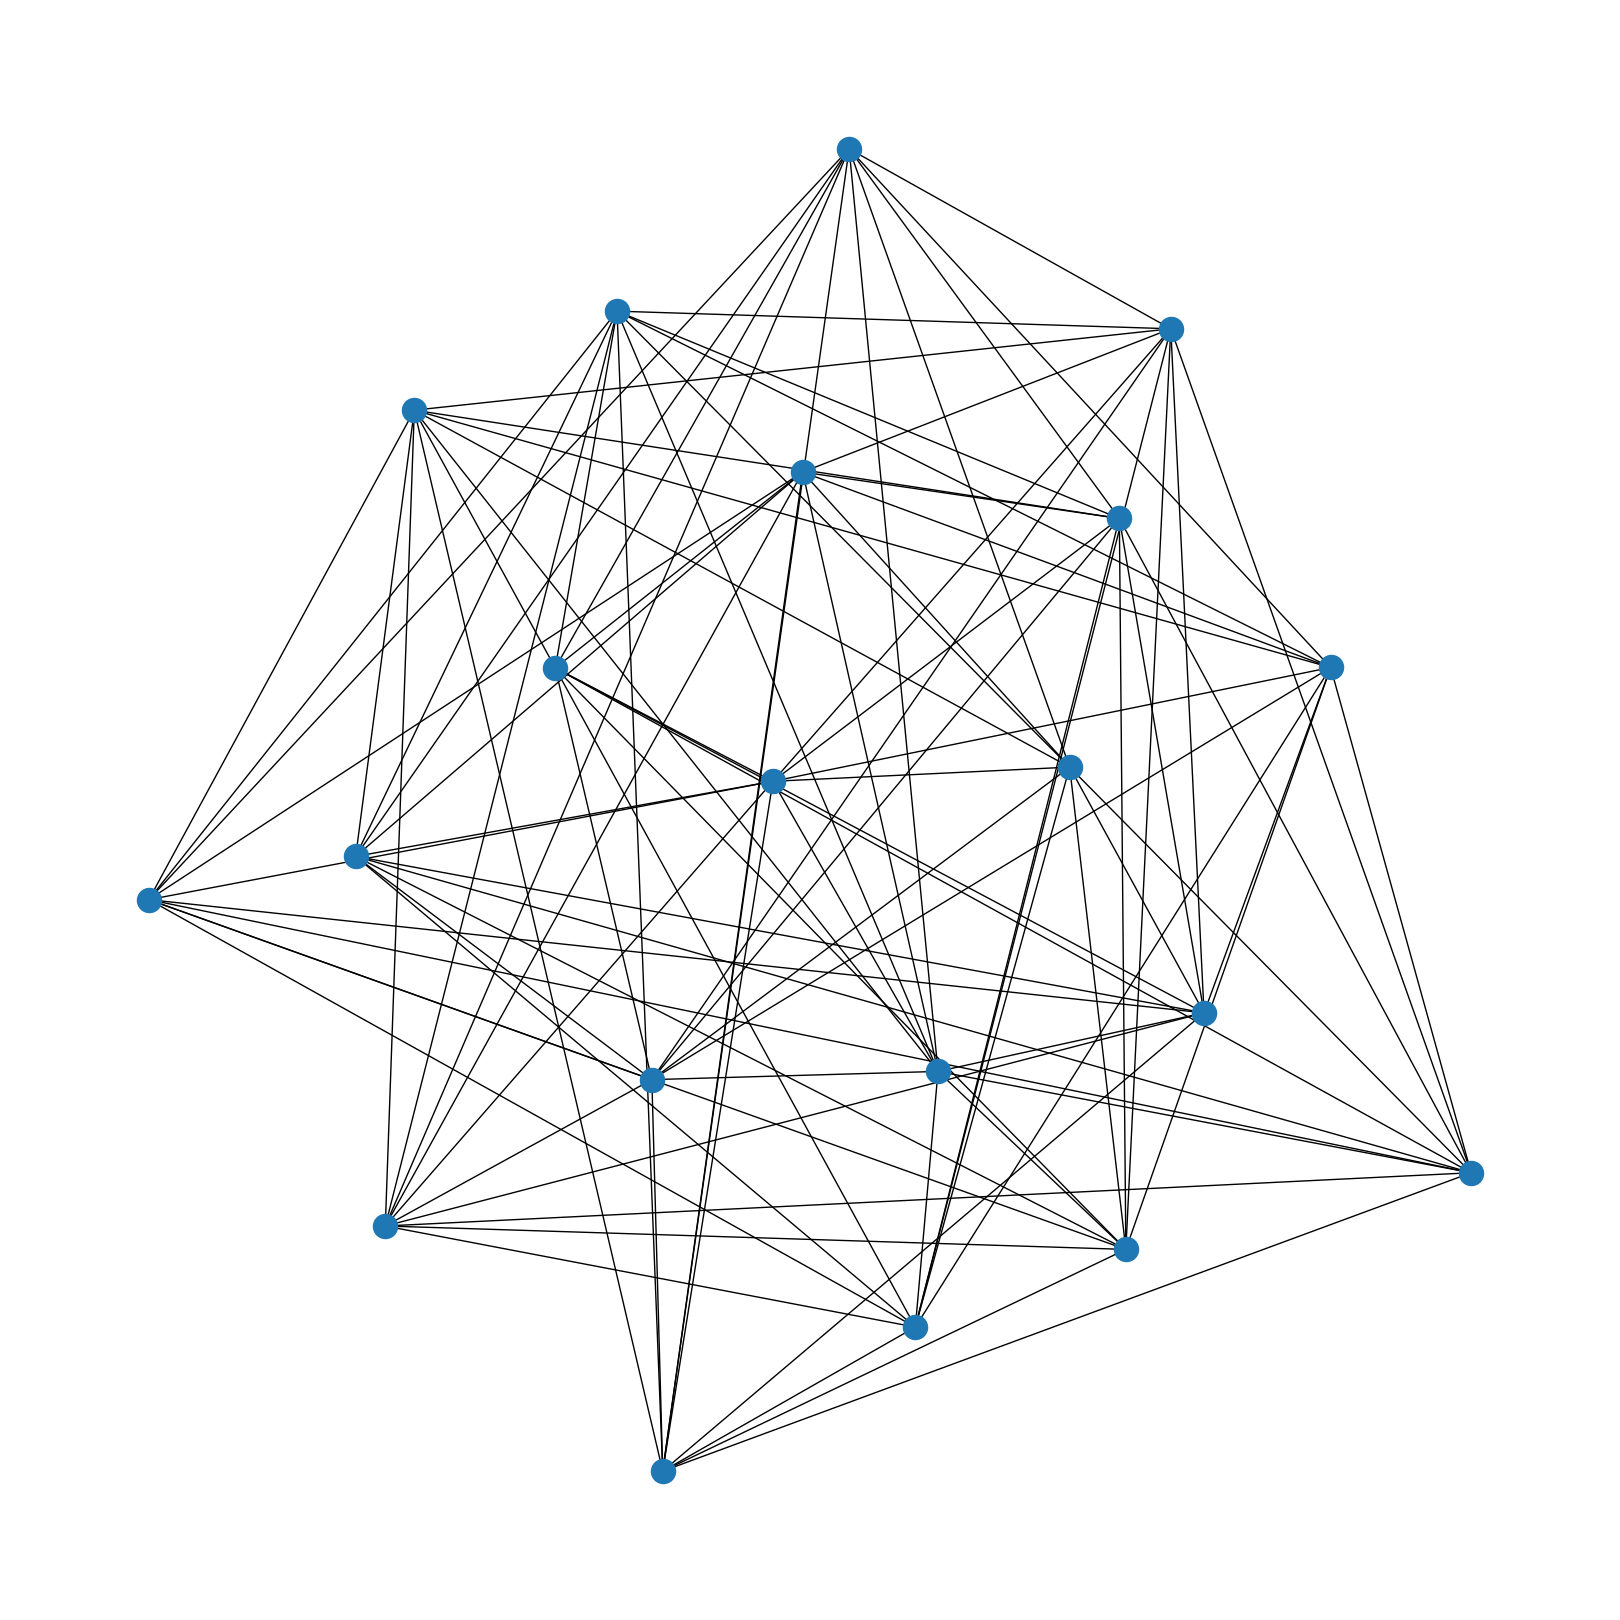

In [ ]:
plt.figure(figsize=(16,16))
nx.draw(sim_G)

In [ ]:
print(sim_G.nodes())

most_similar

ms_value = similarity_matrix.max(axis=1)
ms_value

y_tick = ['Topic-{}'.format(x+1) for x in range(10)]
x_tick = ['Topic-{}'.format(x+1) for x in range(10)]

sns.set(font_scale=2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
# Second VS Third Wave

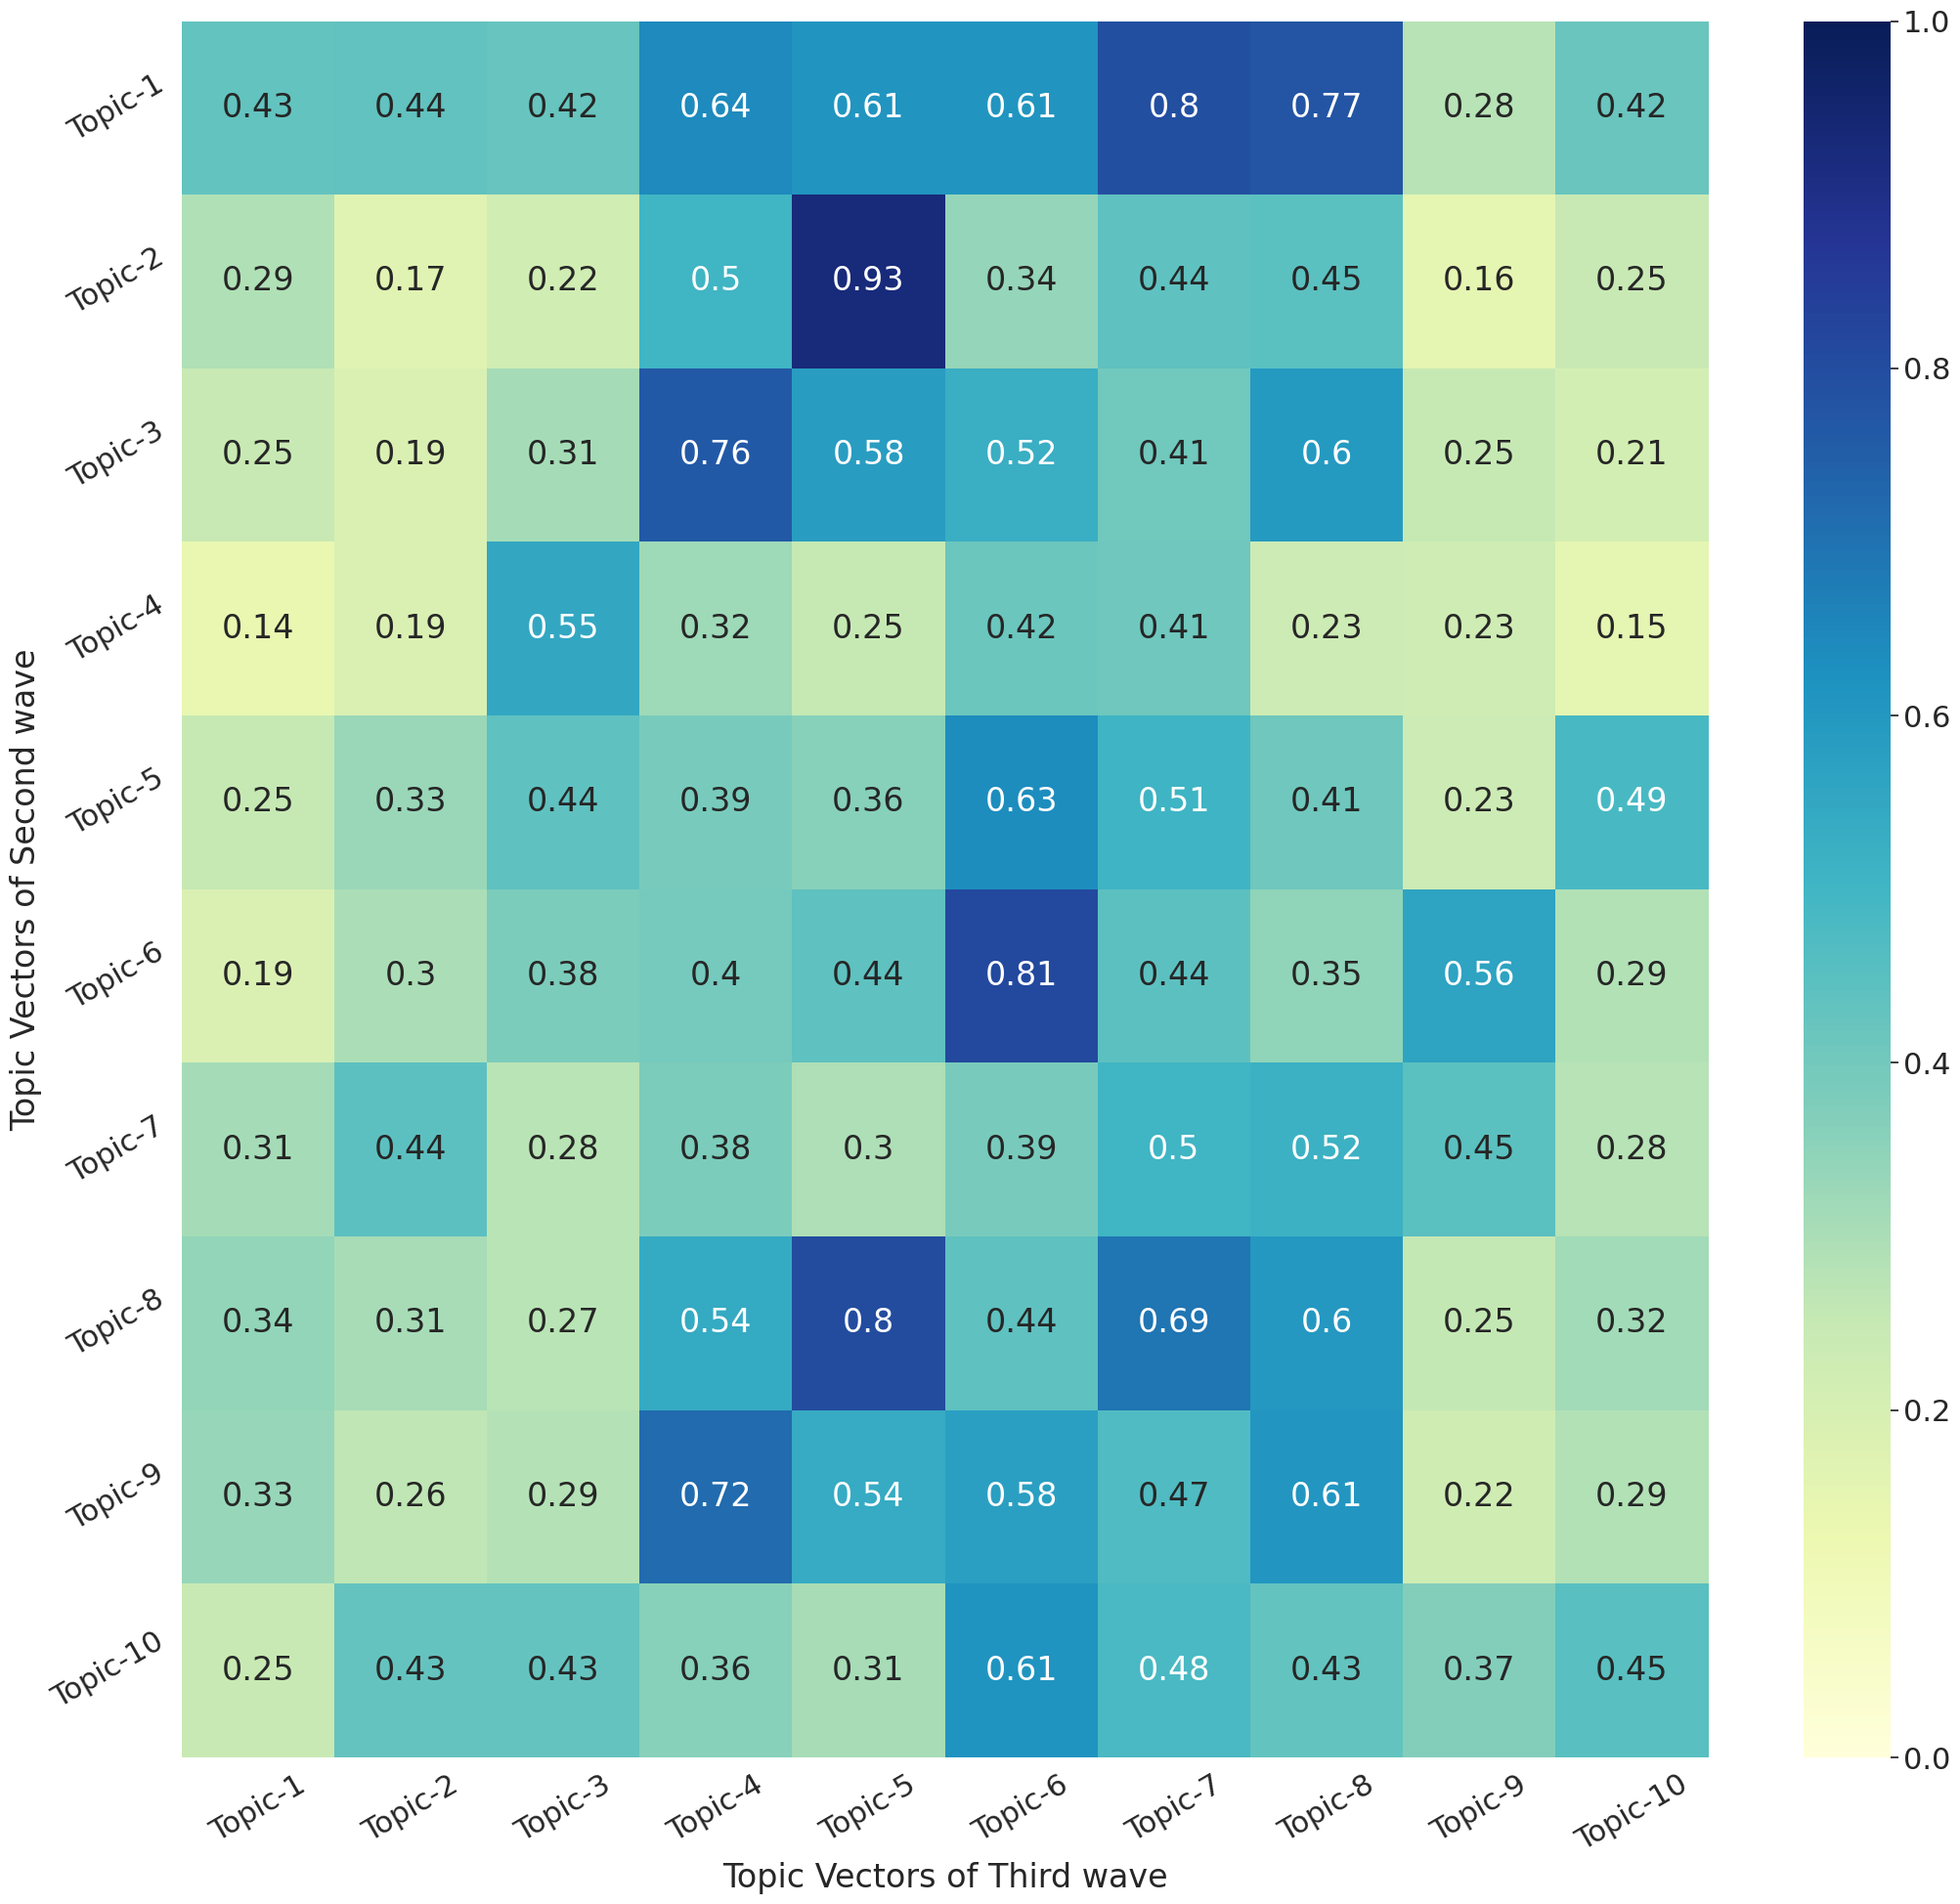

In [ ]:
fig = plt.figure(figsize=(22, 20))
cmap = sns.cm.rocket_r
hm = sns.heatmap(similarity_matrix, annot=True, vmin=0, vmax=1, xticklabels=True, yticklabels=True, cmap = "YlGnBu")
_ = hm.set_xticklabels(x_tick, rotation=30)
_ =  hm.set_yticklabels(y_tick, rotation=30)
plt.xlabel("Topic Vectors of Third wave")
plt.ylabel("Topic Vectors of Second wave")
plt.tight_layout()
plt.savefig("heatmap.pdf", bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [ ]:
def get_words(model, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = False
    if model.get_num_topics() > num_topics:
      reduced_topic_lists = model.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [ ]:
words_secondwave, _, _= get_words(model_second_reduced, 10, model_second_reduced.get_num_topics())
words_thirdwave, _, _ = get_words(model_third_reduced, 10, model_third_reduced.get_num_topics())
words_secondwave

array([['pandemic', 'epidemic', 'outbreak', ..., 'risk', 'deadly',
        'crisis'],
       ['vaccinated', 'vaccines', 'vaccinations', ..., 'cdc', 'immune',
        'antibodies'],
       ['indonesian', 'indonesia', 'jakarta', ..., 'england', 'borneo',
        'anonymous'],
       ...,
       ['ramadan', 'muslims', 'yg', ..., 'ji', 'miss', 'comply'],
       ['lockdown', 'india', 'delhi', ..., 'loc', 'modi', 'lakh'],
       ['easter', 'save', 'ended', ..., 'ending', 'final', 'caused']],
      dtype='<U14')

In [ ]:
mstg = []
for x in most_similar:
  mstg.append(words_third[x])
len(mstg)

10

In [ ]:
df3 = pd.DataFrame({"Topics of Second Wave":[','.join(list(x)) for x in words_second], "Most Similar topics in Third Wave": [','.join(list(x)) for x in mstg], "Similarity Score": list(ms_value)})
df3

Topics of Second Wave  \
0  sars,quarantine,epidemic,lockdown,positif,hosp...   
1  vaccine,vaccines,vaccinations,vaccinated,vacci...   
2  pandemic,quarantine,epidemic,outbreak,sars,cdc...   
3  junghwan,sad,unfair,pyutdekblr,sinovac,poorer,...   
4  bts,suju,donated,solidarity,baekhyun,donate,do...   
5  face,smiling,grinning,crying,masks,cry,mask,wi...   
6  indonesian,indonesia,jakarta,malaysia,jokowi,a...   
7  vaccinations,vaccination,vaccines,vaccine,vacc...   
8  pandemic,epidemic,outbreak,crisis,sars,risk,ev...   
9  celebrate,happy,anniversary,celebrated,birthda...   

                   Most Similar topics in Third Wave  Similarity Score  
0  positive,severe,restrictions,rage,quarantine,j...          0.795470  
1  vaccine,quarantine,pandemic,coronavirus,diseas...          0.929151  
2  pandemic,quarantine,hospitalized,disease,vacci...          0.763005  
3  good,project,recovery,hospitalized,soon,positi...          0.549909  
4  grinning,squinting,quarantine,face,rage,pandem...          0.634287  
5  grinning,squinting,quarantine,face,rage,pandem...          0.808971  
6  quarantine,pandemic,cases,indonesia,vaccine,ho...          0.518487  
7  vaccine,quarantine,pandemic,coronavirus,diseas...          0.804450  
8  pandemic,quarantine,hospitalized,disease,vacci...          0.716412  
9  grinning,squinting,quarantine,face,rage,pandem...          0.614400

In [ ]:
df3.to_csv('df3.csv')

In [ ]:
# First VS Third wave

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(topic_vectors_firstwave, topic_vectors_thirdwave)
most_similar = similarity_matrix.argmax(axis=1)

ms_value = similarity_matrix.max(axis=1)

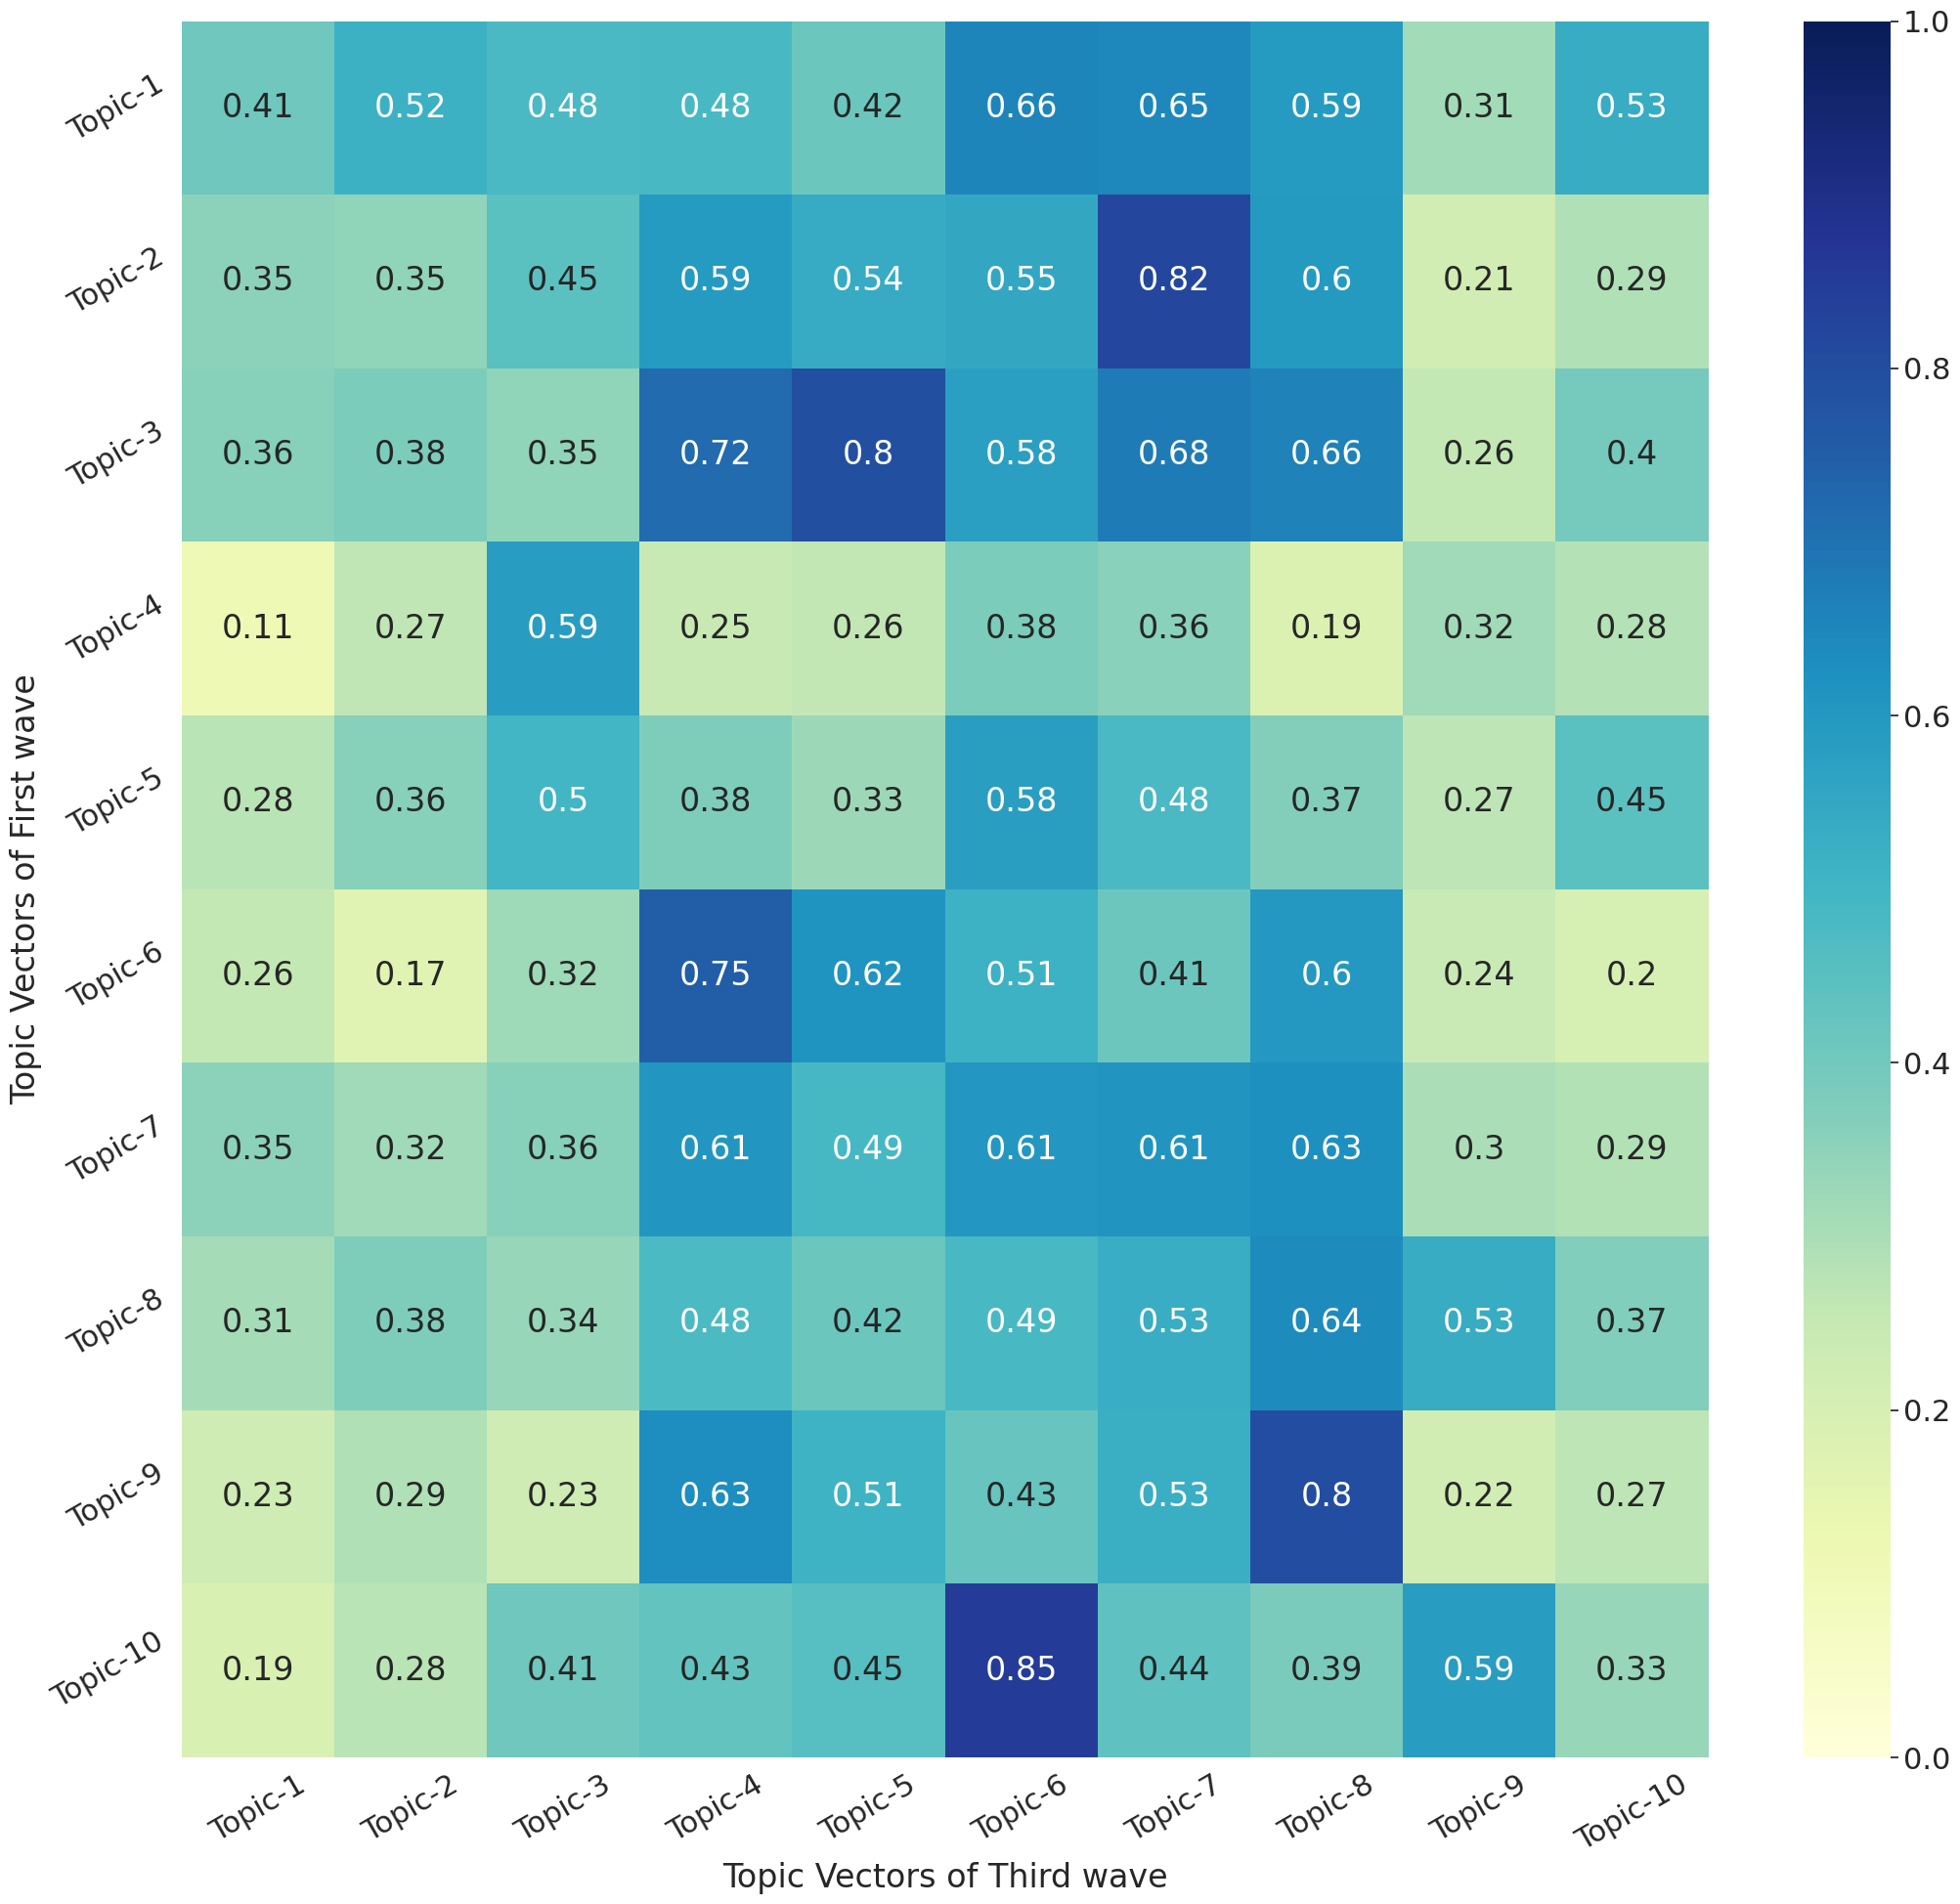

In [ ]:
fig = plt.figure(figsize=(22, 20))
cmap = sns.cm.rocket_r
hm = sns.heatmap(similarity_matrix, annot=True, vmin=0, vmax=1, xticklabels=True, yticklabels=True, cmap = "YlGnBu")
_ = hm.set_xticklabels(x_tick, rotation=30)
_ =  hm.set_yticklabels(y_tick, rotation=30)
plt.xlabel("Topic Vectors of Third wave")
plt.ylabel("Topic Vectors of First wave")
plt.tight_layout()
plt.savefig("heatmap.pdf", bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [ ]:
mstg = []
for x in most_similar:
  mstg.append(words_third[x])
len(mstg)

10

In [ ]:
df2 = pd.DataFrame({"Topics of First Wave":[','.join(list(x)) for x in words_first], "Most Similar topics in Third Wave": [','.join(list(x)) for x in mstg], "Similarity Score": list(ms_value)})
df2.to_csv('df2.csv')
df2

Topics of First Wave  \
0  postponed,donated,update,surabaya,official,ase...   
1  trump,disaster,lockdown,pandemic,crisis,sars,c...   
2  sars,outbreak,quarantine,vaccine,epidemic,flu,...   
3  corona,fuck,sad,sars,postponed,loudly,scary,fl...   
4  bts,jae,kim,seoul,tune,korean,song,sars,suga,f...   
5  pandemic,quarantine,epidemic,outbreak,sars,flu...   
6  sars,muslims,epidemic,pandemic,ramadan,disaste...   
7  indonesia,indonesian,jakarta,malaysia,asean,su...   
8  deaths,epidemic,sars,pandemic,outbreak,death,d...   
9  masks,mask,crying,face,sars,smiling,tears,loud...   

                   Most Similar topics in Third Wave  Similarity Score  
0  grinning,squinting,quarantine,face,rage,pandem...          0.655676  
1  positive,severe,restrictions,rage,quarantine,j...          0.818261  
2  vaccine,quarantine,pandemic,coronavirus,diseas...          0.796086  
3  good,project,recovery,hospitalized,soon,positi...          0.585220  
4  grinning,squinting,quarantine,face,rage,pandem...          0.581692  
5  pandemic,quarantine,hospitalized,disease,vacci...          0.747371  
6  quarantine,pandemic,cases,indonesia,vaccine,ho...          0.626445  
7  quarantine,pandemic,cases,indonesia,vaccine,ho...          0.636859  
8  quarantine,pandemic,cases,indonesia,vaccine,ho...          0.798707  
9  grinning,squinting,quarantine,face,rage,pandem...          0.850988

In [ ]:
# first second wave

In [ ]:
topic_vectors_firstwave = model_first_reduced.topic_vectors_reduced
topic_vectors_secondwave = model_second_reduced.topic_vectors_reduced
print(topic_vectors_firstwave.shape, topic_vectors_secondwave.shape)

(10, 512) (10, 512)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(topic_vectors_firstwave, topic_vectors_secondwave)
most_similar = similarity_matrix.argmax(axis=1)

ms_value = similarity_matrix.max(axis=1)

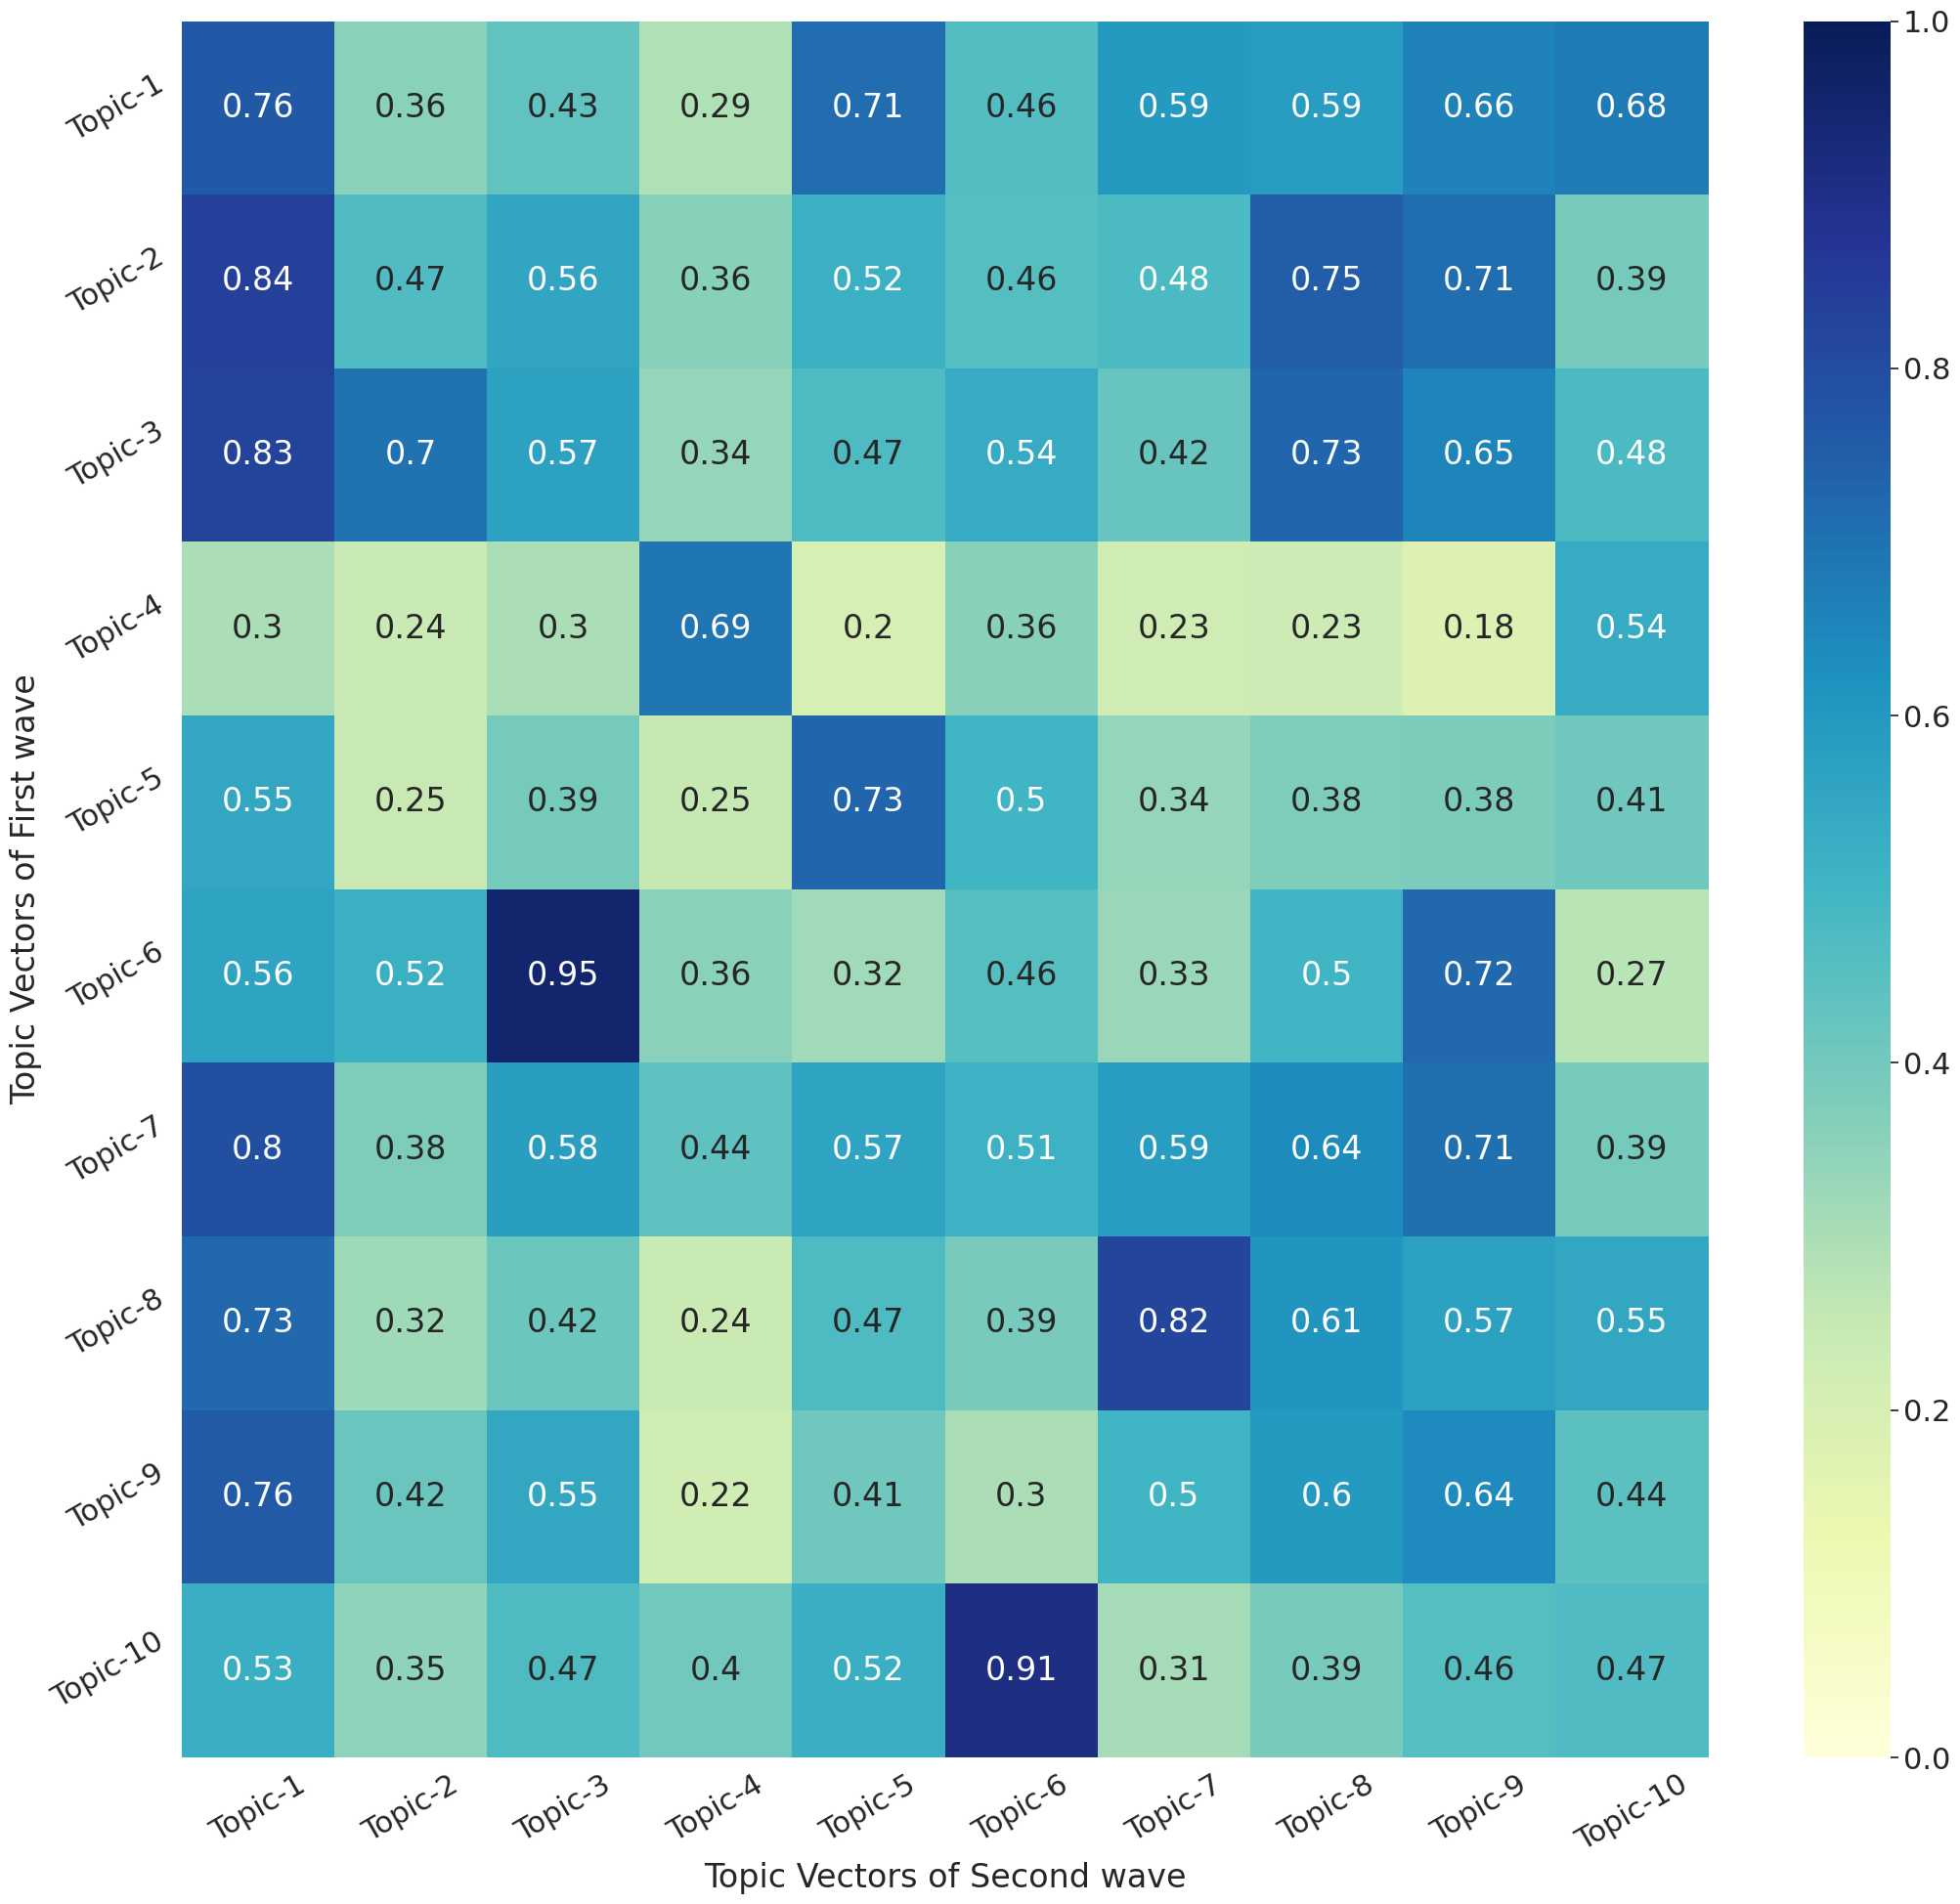

In [ ]:
fig = plt.figure(figsize=(22, 20))
cmap = sns.cm.rocket_r
hm = sns.heatmap(similarity_matrix, annot=True, vmin=0, vmax=1, xticklabels=True, yticklabels=True, cmap = "YlGnBu")
_ = hm.set_xticklabels(x_tick, rotation=30)
_ =  hm.set_yticklabels(y_tick, rotation=30)
plt.xlabel("Topic Vectors of Second wave")
plt.ylabel("Topic Vectors of First wave")
plt.tight_layout()
plt.savefig("heatmap.pdf", bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [ ]:
mstg = []
for x in most_similar:
  mstg.append(words_second[x])
len(mstg)

10

In [ ]:
df1 = pd.DataFrame({"Topics of First Wave(top 10 words)":[','.join(list(x)) for x in words_first], "Most Similar topics in Second Wave": [','.join(list(x)) for x in mstg], "Similarity Score": list(ms_value)})
df1.to_csv('df1.csv')

In [ ]:
df1

Topics of First Wave(top 10 words)  \
0  postponed,donated,update,surabaya,official,ase...   
1  trump,disaster,lockdown,pandemic,crisis,sars,c...   
2  sars,outbreak,quarantine,vaccine,epidemic,flu,...   
3  corona,fuck,sad,sars,postponed,loudly,scary,fl...   
4  bts,jae,kim,seoul,tune,korean,song,sars,suga,f...   
5  pandemic,quarantine,epidemic,outbreak,sars,flu...   
6  sars,muslims,epidemic,pandemic,ramadan,disaste...   
7  indonesia,indonesian,jakarta,malaysia,asean,su...   
8  deaths,epidemic,sars,pandemic,outbreak,death,d...   
9  masks,mask,crying,face,sars,smiling,tears,loud...   

                  Most Similar topics in Second Wave  Similarity Score  
0  sars,quarantine,epidemic,lockdown,positif,hosp...          0.764189  
1  sars,quarantine,epidemic,lockdown,positif,hosp...          0.836495  
2  sars,quarantine,epidemic,lockdown,positif,hosp...          0.831793  
3  junghwan,sad,unfair,pyutdekblr,sinovac,poorer,...          0.693943  
4  bts,suju,donated,solidarity,baekhyun,donate,do...          0.727499  
5  pandemic,quarantine,epidemic,outbreak,sars,cdc...          0.953946  
6  sars,quarantine,epidemic,lockdown,positif,hosp...          0.796439  
7  indonesian,indonesia,jakarta,malaysia,jokowi,a...          0.822984  
8  sars,quarantine,epidemic,lockdown,positif,hosp...          0.758558  
9  face,smiling,grinning,crying,masks,cry,mask,wi...          0.906356

In [ ]:
from google.colab import files
df1.to_csv('INDO_df1.csv')
files.download('INDO_df1.csv')

df2.to_csv('INDO_df2.csv')
files.download('INDO_df2.csv')

df3.to_csv('INDO_df3.csv')
files.download('INDO_df3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>